In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def plot_training_losses(data, loss="MAE", range=np.arange(0,0.7, 0.05)):
    plt.plot(data, marker='.', linestyle='-')
    plt.yticks(range)
    plt.xlabel('Epoch')
    plt.ylabel(loss)
    plt.grid(True)
    plt.show()

def make_netmat(data, netmat_dim=100):

    # actually, this all testing so just need one such netmat I think. Since schf100 then one sub is (100*(100-1))/2 = 4950
    sing_sub = int((netmat_dim * (netmat_dim-1))/2)

    # get indeces of upptri cause all these vec netmats are upper trinagles. 
    out_mat_init = np.ones(2*sing_sub+netmat_dim).reshape(netmat_dim,netmat_dim)

    inds_uptri = np.triu_indices_from(out_mat_init,k=1) # k=1 means no diagonals
    inds_lowtri = np.tril_indices_from(out_mat_init,k=-1) # k=1 means no diagonal
    # print(len(inds_uptri), len(inds_uptri[0]), len(inds_uptri[1])) # make sure its same value as sing_sub above=n(n-1)/2
    # print(len(inds_lowtri), len(inds_lowtri[0]),len(inds_lowtri[1])) # make sure its same value as sing_sub above=n(n-1)/2
    out_mat_val = out_mat_init
    # out_mat_val[inds_uptri] = data
    out_mat_val[inds_lowtri] = data
    # Populate the upper triangle by transposing the lower triangle values
    out_mat_init[inds_uptri] = out_mat_init.T[inds_uptri]

    return out_mat_init

def show_netmats(data1, data2, netmat_dim=100):
    img1 = make_netmat(data1)
    img2 = make_netmat(data2)

    fig, axes = plt.subplots(1, 2, figsize=(11, 5))

    axes[0].imshow(img1, vmin=-1, vmax=1)
    axes[0].set_title('Ground Truth')
    axes[0].axis("off")

    plot2=axes[1].imshow(img2, vmin=-1, vmax=1)
    axes[1].set_title('Sequentially Generated by Edge (cell)')
    axes[1].axis("off")

    fig.colorbar(plot2)
    plt.tight_layout()

def show_subj_hemi(ground_truth_mat, pred_mat, subj_idx):
    ground_truth = ground_truth_mat[subj_idx, :]
    pred = pred_mat[subj_idx, :]
    print(f"Correlation: {np.corrcoef(ground_truth, pred)[0,1]}")
    show_netmats(ground_truth, pred)


def show_made_netmats(data1, data2, netmat_dim=100):
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))

    axes[0].imshow(data1, vmin=-1, vmax=1)
    axes[0].set_title('Ground Truth')
    axes[0].axis("off")

    plot2=axes[1].imshow(data2, vmin=-1, vmax=1)
    axes[1].set_title('Sequentially Generated by Node (column)')
    axes[1].axis("off")

    fig.colorbar(plot2)
    plt.tight_layout()

def show_subj_hemi_made(ground_truth_mat, pred_mat, subj_idx, netmat_dim=100):

    ground_truth = ground_truth_mat[subj_idx, :, :]
    pred = pred_mat[subj_idx, :, :]

    corr_triu = np.corrcoef(ground_truth[np.triu_indices_from(ground_truth, k=1)], pred[np.triu_indices_from(pred, k=1)])[0,1]
    corr_tril = np.corrcoef(ground_truth[np.tril_indices_from(ground_truth, k=-1)], pred[np.tril_indices_from(pred, k=-1)])[0,1]

    print(f"Upper triangle correlation: {corr_triu}")
    print(f"Lower triangle correlation: {corr_tril}")

    show_made_netmats(ground_truth, pred, netmat_dim=netmat_dim)

def get_lower_tris(mat):
    trils = []
    for i in range(mat.shape[0]):
        tril = mat[i, :, :][np.tril_indices_from(mat[i, :, :], k=-1)]
        trils.append(tril)
    return np.array(trils)

# Large Conv Model

Model parameters: 296,906,552


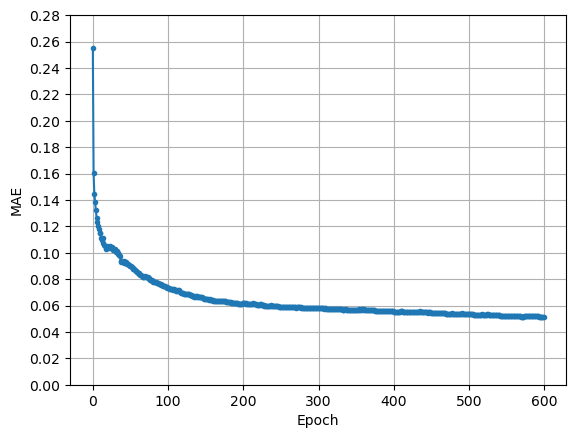

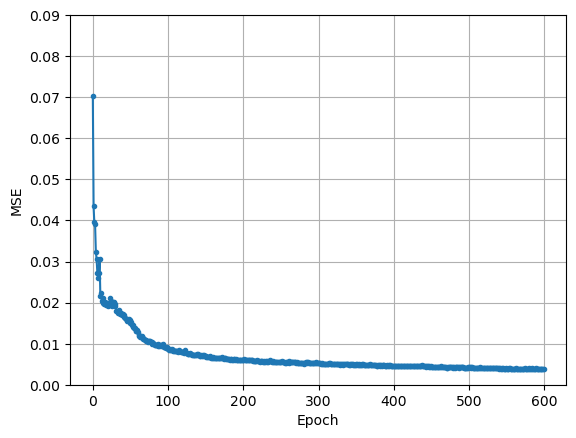

In [3]:
# Training curve
MAEs = [
    0.25512427,
    0.1606202,
    0.14450374,
    0.13869515,
    0.13203229,
    0.12640399,
    0.12349166,
    0.12047569,
    0.11778469,
    0.11501496,
    0.11509412,
    0.111414626,
    0.109837085,
    0.111411236,
    0.10711446,
    0.105683774,
    0.104732215,
    0.103025876,
    0.10450546,
    0.10489906,
    0.10330462,
    0.10358728,
    0.10463703,
    0.10474844,
    0.103374936,
    0.103642486,
    0.104514204,
    0.10172211,
    0.10185352,
    0.10201275,
    0.103030026,
    0.10071227,
    0.100984536,
    0.0995976,
    0.09868747,
    0.09852387,
    0.09777317,
    0.094051905,
    0.09332537,
    0.09339024,
    0.0929245,
    0.09335946,
    0.09252883,
    0.0930125,
    0.09264994,
    0.09159231,
    0.09145357,
    0.091289274,
    0.091000825,
    0.09022523,
    0.08980741,
    0.08963084,
    0.088974245,
    0.088568605,
    0.087955676,
    0.0876395,
    0.08684873,
    0.08630383,
    0.08594736,
    0.08527618,
    0.08456125,
    0.08433016,
    0.083790936,
    0.08340396,
    0.083123915,
    0.08253082,
    0.081920624,
    0.08183568,
    0.081875235,
    0.081989996,
    0.08173635,
    0.08130332,
    0.08136134,
    0.08124654,
    0.08109814,
    0.08009048,
    0.07970539,
    0.07931643,
    0.07911157,
    0.07866355,
    0.07791242,
    0.07775389,
    0.07779588,
    0.07787243,
    0.077747054,
    0.07707926,
    0.076991715,
    0.076893345,
    0.07620963,
    0.076199055,
    0.07609554,
    0.07584686,
    0.07533554,
    0.07490016,
    0.07474618,
    0.07476898,
    0.07489269,
    0.07438439,
    0.07377471,
    0.07352624,
    0.073161,
    0.07295079,
    0.07255319,
    0.07232109,
    0.07235826,
    0.07231647,
    0.07220941,
    0.0718643,
    0.07217257,
    0.07170293,
    0.07165598,
    0.07123512,
    0.07127712,
    0.071859136,
    0.07139207,
    0.070823014,
    0.070042774,
    0.06967569,
    0.06942782,
    0.06920814,
    0.069261566,
    0.068911806,
    0.0687348,
    0.06851582,
    0.06890764,
    0.06875685,
    0.068580404,
    0.068588905,
    0.06842374,
    0.068253785,
    0.06797602,
    0.06759622,
    0.06717688,
    0.067010075,
    0.06709199,
    0.06681195,
    0.06660427,
    0.06684286,
    0.06697735,
    0.06665705,
    0.06643289,
    0.06631755,
    0.06657594,
    0.06655905,
    0.06631659,
    0.06618469,
    0.06561975,
    0.065484755,
    0.06524159,
    0.06485514,
    0.06481421,
    0.064788334,
    0.0647643,
    0.06483107,
    0.06453415,
    0.06485384,
    0.06443973,
    0.063965365,
    0.06395449,
    0.06380941,
    0.06359956,
    0.06341249,
    0.06327851,
    0.06321403,
    0.06327097,
    0.06344002,
    0.06329085,
    0.06343797,
    0.063419014,
    0.06358925,
    0.0637257,
    0.06375643,
    0.06360485,
    0.06332612,
    0.063406035,
    0.06336821,
    0.06317404,
    0.06297938,
    0.063008346,
    0.062981136,
    0.0626196,
    0.06231968,
    0.06255106,
    0.06252871,
    0.06227712,
    0.062038854,
    0.061920334,
    0.061680105,
    0.061695945,
    0.06176918,
    0.06170366,
    0.06159635,
    0.061653983,
    0.061465126,
    0.061408866,
    0.06138542,
    0.061396867,
    0.061317496,
    0.06137497,
    0.061565097,
    0.06155866,
    0.061720505,
    0.06161834,
    0.06154453,
    0.06119675,
    0.060944233,
    0.061091766,
    0.061217565,
    0.06124438,
    0.061443,
    0.06118072,
    0.06131408,
    0.061408117,
    0.06155331,
    0.061192255,
    0.060934555,
    0.06117105,
    0.060826354,
    0.06053286,
    0.06040746,
    0.060515843,
    0.06051446,
    0.06083502,
    0.060980737,
    0.060589142,
    0.060138963,
    0.060100563,
    0.059987493,
    0.060031205,
    0.059941184,
    0.059856538,
    0.059923973,
    0.0597317,
    0.05968323,
    0.059747748,
    0.059744157,
    0.0598986,
    0.060060035,
    0.05991033,
    0.059830967,
    0.059609152,
    0.059410598,
    0.059386272,
    0.059442725,
    0.059447013,
    0.05947756,
    0.059329726,
    0.059093017,
    0.05900513,
    0.059140146,
    0.05915356,
    0.059250794,
    0.059186693,
    0.059078965,
    0.05889734,
    0.058938716,
    0.05874983,
    0.05863492,
    0.058640286,
    0.058766685,
    0.05874382,
    0.0586647,
    0.058548488,
    0.0586408,
    0.05867488,
    0.058704875,
    0.05889394,
    0.058760047,
    0.058712106,
    0.058575053,
    0.058454085,
    0.058508694,
    0.058597863,
    0.058544584,
    0.058541697,
    0.058672085,
    0.05850868,
    0.058347274,
    0.05831326,
    0.05830068,
    0.058067407,
    0.05800965,
    0.058194425,
    0.05805544,
    0.058040068,
    0.058234308,
    0.058235604,
    0.058163323,
    0.058273952,
    0.05816892,
    0.058296595,
    0.05815355,
    0.058033742,
    0.057998076,
    0.057999298,
    0.05811133,
    0.058130253,
    0.05812929,
    0.058267526,
    0.0583308,
    0.05839659,
    0.05825011,
    0.058216225,
    0.058352247,
    0.05829203,
    0.058295775,
    0.05805796,
    0.05773686,
    0.057827074,
    0.057822093,
    0.057630554,
    0.05754501,
    0.057547223,
    0.0576035,
    0.05740576,
    0.057259575,
    0.05731084,
    0.057192694,
    0.05710092,
    0.05723013,
    0.05724441,
    0.057296395,
    0.057193115,
    0.057190083,
    0.05720248,
    0.05746054,
    0.057450436,
    0.057370584,
    0.057182938,
    0.057190556,
    0.05713245,
    0.05705878,
    0.056980595,
    0.056866325,
    0.056980073,
    0.057074167,
    0.05716761,
    0.05693808,
    0.05682116,
    0.05674016,
    0.05676007,
    0.056820225,
    0.056787122,
    0.05670321,
    0.056797143,
    0.05679605,
    0.05657664,
    0.056536585,
    0.056694992,
    0.056573976,
    0.056585055,
    0.056700684,
    0.056893002,
    0.056990214,
    0.05653028,
    0.056492683,
    0.056743458,
    0.057101652,
    0.05707559,
    0.056948204,
    0.056990407,
    0.05695372,
    0.056764554,
    0.05679518,
    0.056804653,
    0.0567523,
    0.05664533,
    0.056648143,
    0.056609526,
    0.056593392,
    0.05647396,
    0.05629913,
    0.056549225,
    0.05644171,
    0.056264088,
    0.055929232,
    0.055915046,
    0.05596294,
    0.05582306,
    0.055854034,
    0.055807874,
    0.055911176,
    0.055839792,
    0.055692192,
    0.055989087,
    0.05599914,
    0.05573605,
    0.055644397,
    0.055695184,
    0.055717085,
    0.055703923,
    0.05562563,
    0.055597033,
    0.055707857,
    0.05562656,
    0.055563834,
    0.055689994,
    0.055661406,
    0.05552026,
    0.055533558,
    0.055469867,
    0.055370606,
    0.055375103,
    0.055320863,
    0.055299483,
    0.055279274,
    0.05530941,
    0.055369634,
    0.05539674,
    0.0555262,
    0.05548833,
    0.055491503,
    0.05534251,
    0.05520378,
    0.055152584,
    0.055130687,
    0.05519885,
    0.055141892,
    0.05518251,
    0.05537449,
    0.055384353,
    0.0551381,
    0.05526989,
    0.05514749,
    0.05497964,
    0.054991305,
    0.054980613,
    0.055251043,
    0.055373237,
    0.055400256,
    0.055078503,
    0.05507581,
    0.055107,
    0.0551827,
    0.05564813,
    0.05519187,
    0.055168986,
    0.055218305,
    0.055166747,
    0.05523447,
    0.055301882,
    0.055001505,
    0.054868784,
    0.05494079,
    0.0547739,
    0.0546969,
    0.0548146,
    0.055011258,
    0.054877322,
    0.054585278,
    0.054487217,
    0.054248217,
    0.05427422,
    0.05421926,
    0.05423051,
    0.054370333,
    0.054325588,
    0.054151256,
    0.0540845,
    0.05415524,
    0.054198414,
    0.054357387,
    0.054522797,
    0.054459658,
    0.05466673,
    0.05446799,
    0.054338824,
    0.0541683,
    0.054201744,
    0.05394109,
    0.053846948,
    0.053821974,
    0.053754807,
    0.053809747,
    0.05395583,
    0.053948063,
    0.053949844,
    0.054038968,
    0.053815145,
    0.05390045,
    0.05391296,
    0.05367703,
    0.053591743,
    0.05371579,
    0.053935505,
    0.05377989,
    0.053781483,
    0.053864654,
    0.053915877,
    0.05395376,
    0.053960606,
    0.05373172,
    0.053589847,
    0.05357201,
    0.05349808,
    0.053489186,
    0.053637527,
    0.053593393,
    0.053387064,
    0.05321637,
    0.05323067,
    0.053459685,
    0.053492963,
    0.053564943,
    0.053518556,
    0.05325548,
    0.05308314,
    0.0529734,
    0.052974246,
    0.052919816,
    0.052970547,
    0.05313478,
    0.053135198,
    0.052905172,
    0.053068552,
    0.053162515,
    0.0530327,
    0.053203195,
    0.05295372,
    0.053068973,
    0.05318333,
    0.053131048,
    0.053005572,
    0.05284526,
    0.053328242,
    0.053201344,
    0.052875232,
    0.052747317,
    0.052791405,
    0.05295084,
    0.052821234,
    0.052835006,
    0.052854877,
    0.052857406,
    0.053033825,
    0.052884676,
    0.052825943,
    0.052718595,
    0.052734885,
    0.052743495,
    0.05276979,
    0.05241955,
    0.05237046,
    0.05233947,
    0.052287396,
    0.052109975,
    0.05192722,
    0.05195424,
    0.051819805,
    0.051855713,
    0.051812932,
    0.051978536,
    0.05207735,
    0.052068084,
    0.051854637,
    0.05204804,
    0.052016098,
    0.051992606,
    0.052124307,
    0.052298434,
    0.05243581,
    0.052415323,
    0.052157853,
    0.05211396,
    0.052074578,
    0.05205938,
    0.051996935,
    0.051857136,
    0.05180249,
    0.0516412,
    0.051563043,
    0.05160689,
    0.05167386,
    0.051760357,
    0.051974226,
    0.051863104,
    0.051849984,
    0.0518158,
    0.051911645,
    0.05179465,
    0.05183462,
    0.05211975,
    0.05221876,
    0.05231578,
    0.051997256,
    0.052229155,
    0.05242156,
    0.05220107,
    0.052177373,
    0.05219741,
    0.052124638,
    0.052162636,
    0.051919214,
    0.051638,
    0.051515903,
    0.051355224,
    0.05133116,
    0.051570863,
    0.05135466,
    0.051209252,
]
MSEs = [
    0.07032836228609085,
    0.04342203214764595,
    0.0395054891705513,
    0.03907523304224014,
    0.03239527717232704,
    0.03067139722406864,
    0.02731701172888279,
    0.025993328541517258,
    0.02717064507305622,
    0.03070523403584957,
    0.02164347656071186,
    0.02240183763206005,
    0.020472269505262375,
    0.020019153133034706,
    0.021114705130457878,
    0.019745051860809326,
    0.02006918378174305,
    0.019489655271172523,
    0.019896943122148514,
    0.019825058057904243,
    0.01908883824944496,
    0.01951802335679531,
    0.01949780434370041,
    0.021206576377153397,
    0.020379647612571716,
    0.019431712105870247,
    0.01913461461663246,
    0.020114736631512642,
    0.020063132047653198,
    0.019599568098783493,
    0.019273562356829643,
    0.017966782674193382,
    0.018020695075392723,
    0.01770278997719288,
    0.017437605187296867,
    0.018238604068756104,
    0.017125627025961876,
    0.01723060943186283,
    0.017358826473355293,
    0.017088737338781357,
    0.01718512549996376,
    0.01696254312992096,
    0.016567490994930267,
    0.016254769638180733,
    0.015949994325637817,
    0.01596561260521412,
    0.015637757256627083,
    0.01575460284948349,
    0.016054773703217506,
    0.015689469873905182,
    0.01505810022354126,
    0.01516684703528881,
    0.014548666775226593,
    0.01446331012994051,
    0.014056590385735035,
    0.013763333670794964,
    0.013867756351828575,
    0.013011396862566471,
    0.013049081899225712,
    0.013272990472614765,
    0.012782805599272251,
    0.012190434150397778,
    0.01191824208945036,
    0.011654190719127655,
    0.011531650088727474,
    0.011820725165307522,
    0.011436025612056255,
    0.011106647551059723,
    0.011137229390442371,
    0.010949484072625637,
    0.010829363018274307,
    0.010602270253002644,
    0.010531832464039326,
    0.01049795188009739,
    0.010582047514617443,
    0.010768074542284012,
    0.010578774847090244,
    0.010297057218849659,
    0.010398752056062222,
    0.009989088401198387,
    0.010272649116814137,
    0.009936594404280186,
    0.009691647253930569,
    0.009749839082360268,
    0.009571751579642296,
    0.009622173383831978,
    0.009540264494717121,
    0.01002976018935442,
    0.009533011354506016,
    0.009626426734030247,
    0.00947121623903513,
    0.009723368100821972,
    0.009662589989602566,
    0.009893539361655712,
    0.009136047214269638,
    0.00913538783788681,
    0.009127289056777954,
    0.008861289359629154,
    0.008860783651471138,
    0.009073922410607338,
    0.008715681731700897,
    0.008498705923557281,
    0.00845025759190321,
    0.008676457218825817,
    0.0084804343059659,
    0.008692782372236252,
    0.008515426889061928,
    0.008321755565702915,
    0.008245907723903656,
    0.008107421919703484,
    0.008225638419389725,
    0.008207526989281178,
    0.008274425752460957,
    0.008087432943284512,
    0.008254945278167725,
    0.008548690937459469,
    0.008301148191094398,
    0.007960058748722076,
    0.008040964603424072,
    0.008050178177654743,
    0.00794957298785448,
    0.007713754661381245,
    0.007902898825705051,
    0.008343958295881748,
    0.007647663354873657,
    0.007743625435978174,
    0.007571992930024862,
    0.007491537369787693,
    0.007441118825227022,
    0.007608362939208746,
    0.007394809741526842,
    0.007492230273783207,
    0.0073237852193415165,
    0.007308726664632559,
    0.007233757525682449,
    0.00734974630177021,
    0.007209300063550472,
    0.007294077891856432,
    0.00734268082305789,
    0.007414814550429583,
    0.007395765278488398,
    0.007213686127215624,
    0.006988790817558765,
    0.007018891628831625,
    0.007191883400082588,
    0.007073183543980122,
    0.007228876929730177,
    0.007064777426421642,
    0.007270162459462881,
    0.007027823943644762,
    0.006832587998360395,
    0.006878105457872152,
    0.00681920675560832,
    0.006694597192108631,
    0.006816733628511429,
    0.00685895374044776,
    0.006963391322642565,
    0.0065702758729457855,
    0.0065226308070123196,
    0.006476731039583683,
    0.006637922488152981,
    0.006414287257939577,
    0.006446703337132931,
    0.006484069861471653,
    0.006437682546675205,
    0.006442161276936531,
    0.006572232581675053,
    0.006451657507568598,
    0.00654962845146656,
    0.006468275096267462,
    0.006491806823760271,
    0.006639986764639616,
    0.006531753111630678,
    0.006473503541201353,
    0.006309358403086662,
    0.00639886362478137,
    0.006404702086001635,
    0.006297219078987837,
    0.006252804771065712,
    0.006329578813165426,
    0.006379838101565838,
    0.006332512013614178,
    0.006126383785158396,
    0.006246516015380621,
    0.0061562806367874146,
    0.0061003705486655235,
    0.006088481284677982,
    0.006247309036552906,
    0.006180516444146633,
    0.006040023639798164,
    0.006183971650898457,
    0.006047177594155073,
    0.006135206203907728,
    0.0059840986505150795,
    0.0060528540052473545,
    0.005955151282250881,
    0.006015293765813112,
    0.006031573284417391,
    0.005952324252575636,
    0.006044901907444,
    0.006125040352344513,
    0.006206221412867308,
    0.006013932637870312,
    0.00595179433003068,
    0.006123958621174097,
    0.00597928324714303,
    0.005999877117574215,
    0.005940729286521673,
    0.006084174383431673,
    0.005967657547444105,
    0.005993123631924391,
    0.006047068629413843,
    0.0059698051773011684,
    0.005824707448482513,
    0.005880933720618486,
    0.005781462881714106,
    0.005892541725188494,
    0.005818211007863283,
    0.005995095241814852,
    0.005763554479926825,
    0.005786514841020107,
    0.005793420597910881,
    0.0056501938961446285,
    0.005760968197137117,
    0.005728364456444979,
    0.0056821685284376144,
    0.0055838050320744514,
    0.005783753469586372,
    0.005626670550554991,
    0.005598566960543394,
    0.005662635900080204,
    0.005747364368289709,
    0.00558910658583045,
    0.005594021175056696,
    0.005674805957823992,
    0.005916167050600052,
    0.00567321851849556,
    0.005793299060314894,
    0.005648079328238964,
    0.005694100167602301,
    0.005648295860737562,
    0.005646005272865295,
    0.00564339105039835,
    0.005524096544831991,
    0.005590697750449181,
    0.005584072787314653,
    0.00547815440222621,
    0.0054497551172971725,
    0.005513195879757404,
    0.005424065515398979,
    0.005534162744879723,
    0.005706861615180969,
    0.005552769638597965,
    0.005593746434897184,
    0.0055178930051624775,
    0.005370830185711384,
    0.005402254406362772,
    0.005519627593457699,
    0.005482548847794533,
    0.005501769948750734,
    0.0053974720649421215,
    0.005678038112819195,
    0.005474564619362354,
    0.00546351820230484,
    0.0054557654075324535,
    0.0054406579583883286,
    0.005468055605888367,
    0.0054322038777172565,
    0.0055998885072767735,
    0.0054725296795368195,
    0.0053520905785262585,
    0.00545803178101778,
    0.0053225294686853886,
    0.005384842399507761,
    0.005377583671361208,
    0.0052420031279325485,
    0.005352672189474106,
    0.005388778168708086,
    0.005328308325260878,
    0.0052732438780367374,
    0.005145719740539789,
    0.0052615380845963955,
    0.005305004771798849,
    0.005425076931715012,
    0.005291320849210024,
    0.005412041209638119,
    0.005441282410174608,
    0.005350576248019934,
    0.005226212088018656,
    0.005189430434256792,
    0.005354198161512613,
    0.005332809407263994,
    0.0052901459857821465,
    0.005198395345360041,
    0.005229671485722065,
    0.005290159955620766,
    0.005455821752548218,
    0.0053598894737660885,
    0.0052330708131194115,
    0.005234685726463795,
    0.005215778015553951,
    0.0052949669770896435,
    0.00531386211514473,
    0.005122664850205183,
    0.005159460008144379,
    0.005288058426231146,
    0.005145685281604528,
    0.005118267145007849,
    0.005080669652670622,
    0.00513581745326519,
    0.005124369636178017,
    0.005123214330524206,
    0.005040732212364674,
    0.005043891258537769,
    0.005219839513301849,
    0.005181622225791216,
    0.0049878996796905994,
    0.004964563995599747,
    0.005029745399951935,
    0.004976547323167324,
    0.005101026501506567,
    0.005028516054153442,
    0.004962591454386711,
    0.005019990727305412,
    0.005016529466956854,
    0.004986671730875969,
    0.005030004773288965,
    0.004959838464856148,
    0.004888889845460653,
    0.004939577076584101,
    0.004947327077388763,
    0.004948838148266077,
    0.0050293742679059505,
    0.004865247756242752,
    0.004944138694554567,
    0.005017143674194813,
    0.00496727554127574,
    0.005052296910434961,
    0.005080074071884155,
    0.004964439198374748,
    0.004861865192651749,
    0.004843253642320633,
    0.004979293793439865,
    0.005055914632976055,
    0.004951023496687412,
    0.004840740002691746,
    0.004932562820613384,
    0.004881161730736494,
    0.004874813370406628,
    0.004819604102522135,
    0.004926668480038643,
    0.0049331593327224255,
    0.004792984575033188,
    0.005010512657463551,
    0.004864965099841356,
    0.0048213438130915165,
    0.004784856457263231,
    0.004932113457471132,
    0.004892993252724409,
    0.004946591332554817,
    0.004916559439152479,
    0.004921977408230305,
    0.004904956556856632,
    0.004835067316889763,
    0.004887503106147051,
    0.004836683627218008,
    0.004850609228014946,
    0.004770969040691853,
    0.0049535115249454975,
    0.0049191988073289394,
    0.004725966602563858,
    0.004783174954354763,
    0.0047494578175246716,
    0.004726686514914036,
    0.004705425817519426,
    0.004759821109473705,
    0.004736520349979401,
    0.004634879529476166,
    0.0046718791127204895,
    0.004747611936181784,
    0.004719682969152927,
    0.004776913672685623,
    0.0046601383946835995,
    0.004715777467936277,
    0.004644777160137892,
    0.00470371451228857,
    0.004711325746029615,
    0.004766233265399933,
    0.004570380784571171,
    0.004638465121388435,
    0.004623533226549625,
    0.004749892745167017,
    0.00463093863800168,
    0.00464378297328949,
    0.00479526212438941,
    0.004734106361865997,
    0.004603757057338953,
    0.004590826109051704,
    0.00457948399707675,
    0.004576896782964468,
    0.004529628902673721,
    0.004598358646035194,
    0.004655246157199144,
    0.004618691746145487,
    0.004611711949110031,
    0.0046076783910393715,
    0.004527858924120665,
    0.004659432452172041,
    0.004600589629262686,
    0.004627838730812073,
    0.004619458690285683,
    0.004577794577926397,
    0.004583622328937054,
    0.004563182592391968,
    0.004531188867986202,
    0.004515469539910555,
    0.0045517426915466785,
    0.004523804411292076,
    0.004506399389356375,
    0.004484095610678196,
    0.004546348936855793,
    0.004499961156398058,
    0.004494153894484043,
    0.004568234086036682,
    0.004550279583781958,
    0.004588644485920668,
    0.004595727659761906,
    0.004537489730864763,
    0.0046218568459153175,
    0.004539651330560446,
    0.004503992386162281,
    0.004446396604180336,
    0.004450011067092419,
    0.004450463689863682,
    0.004487376194447279,
    0.004662275779992342,
    0.004563621710985899,
    0.004690181463956833,
    0.0046774293296039104,
    0.004463209770619869,
    0.004478852730244398,
    0.004516693763434887,
    0.004449822939932346,
    0.004435257520526648,
    0.004647159483283758,
    0.00446932390332222,
    0.00467882351949811,
    0.004349105060100555,
    0.004357751924544573,
    0.0044564176350831985,
    0.004381082020699978,
    0.004400323610752821,
    0.004353241994976997,
    0.004368828143924475,
    0.004290549550205469,
    0.004282390233129263,
    0.004304503556340933,
    0.00432201474905014,
    0.00431943591684103,
    0.004348010290414095,
    0.004260255955159664,
    0.004369025118649006,
    0.004439704120159149,
    0.004354674369096756,
    0.00433309655636549,
    0.004352618474513292,
    0.004362461622804403,
    0.004378607962280512,
    0.004206463694572449,
    0.004374295007437468,
    0.004179188050329685,
    0.004185092635452747,
    0.004246184602379799,
    0.0043532890267670155,
    0.004290532320737839,
    0.004237766843289137,
    0.0042882259003818035,
    0.004256249871104956,
    0.004153968766331673,
    0.0041993726044893265,
    0.004216791596263647,
    0.004186259116977453,
    0.004276730120182037,
    0.004205383360385895,
    0.0041975826025009155,
    0.004243567120283842,
    0.004172713495790958,
    0.004274127073585987,
    0.00419734138995409,
    0.004244647920131683,
    0.004235865548253059,
    0.004228104371577501,
    0.004277238622307777,
    0.004148390144109726,
    0.004145980346947908,
    0.004099421203136444,
    0.004126591607928276,
    0.004098469857126474,
    0.004315793979912996,
    0.0041615767404437065,
    0.0042189485393464565,
    0.00421628262847662,
    0.004077571909874678,
    0.004368372727185488,
    0.004369800910353661,
    0.004093858413398266,
    0.004143297206610441,
    0.004110546782612801,
    0.004092028830200434,
    0.004124519880861044,
    0.004107845015823841,
    0.004100376740098,
    0.0040849484503269196,
    0.004093091934919357,
    0.004032794386148453,
    0.00419617397710681,
    0.00410139886662364,
    0.004049981944262981,
    0.004183757584542036,
    0.004100464284420013,
    0.004110412206500769,
    0.004155240952968597,
    0.004155293572694063,
    0.004062998574227095,
    0.004117288626730442,
    0.004130138084292412,
    0.004086880944669247,
    0.004020914435386658,
    0.0040330300107598305,
    0.004060542210936546,
    0.004107589367777109,
    0.003980107605457306,
    0.003963042516261339,
    0.004041038919240236,
    0.004042592365294695,
    0.004110344685614109,
    0.003997283522039652,
    0.004065436776727438,
    0.004026666283607483,
    0.0039714910089969635,
    0.0039274971932172775,
    0.004135587252676487,
    0.003943426068872213,
    0.00396355427801609,
    0.003950200043618679,
    0.004022527020424604,
    0.0038535348139703274,
    0.003926109056919813,
    0.0038671335205435753,
    0.003964467439800501,
    0.003914901055395603,
    0.0038769312668591738,
    0.0038721859455108643,
    0.004071349278092384,
    0.00395483011379838,
    0.003933231346309185,
    0.0038635318633168936,
    0.0038973467890173197,
    0.0039063976146280766,
    0.0038589206524193287,
    0.0038860521744936705,
    0.003887025872245431,
    0.003971876576542854,
    0.00394301675260067,
    0.003894600784406066,
    0.003865906735882163,
    0.0038227709010243416,
    0.0037968021351844072,
    0.003891959320753813,
    0.0038490991573780775,
    0.0037862458266317844,
    0.003812864888459444,
    0.0038285113405436277,
    0.003876935923472047,
    0.004025449510663748,
    0.0038229431957006454,
    0.00382355903275311,
    0.003870720276609063,
    0.0037984554655849934,
    0.004027343820780516,
    0.003889210755005479,
    0.0038588144816458225,
    0.0038120229728519917,
    0.0038045074325054884,
    0.004009763710200787,
    0.00377640756778419,
    0.003808529581874609,
    0.0038567541632801294,
    0.003931513987481594,
    0.003985254094004631,
    0.0038663363084197044,
    0.003815304022282362,
    0.0038023123051971197,
    0.00379496393725276,
    0.0037647797726094723,
    0.003794511780142784,
    0.00372070400044322,
    0.003832037327811122,
    0.0037945809308439493,
    0.0038166746962815523,
]

print("Model parameters: 296,906,552")
plot_training_losses(MAEs, range=np.arange(0, 0.29, 0.02))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.1, 0.01))

In [219]:
# load_data
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/train_pred.npy")

In [220]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :], test_pred[i, :])
    test_corrs.append(corr[0,1])

In [221]:
train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :], train_pred[i, :])
    train_corrs.append(corr[0,1])

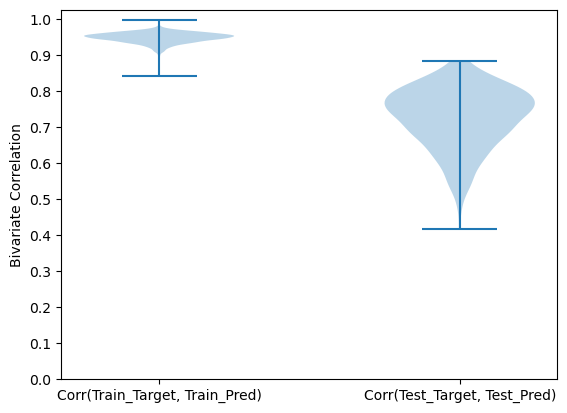

In [222]:
plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()


In [223]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

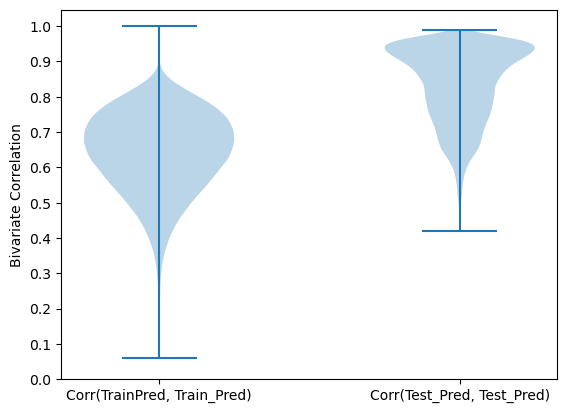

In [224]:
plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

In [225]:
# Corr(train_Target, train_grountruth)
corr = np.corrcoef(train_Target)
traintrain_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_Target, test_Target)
corr = np.corrcoef(test_Target)
testtest_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

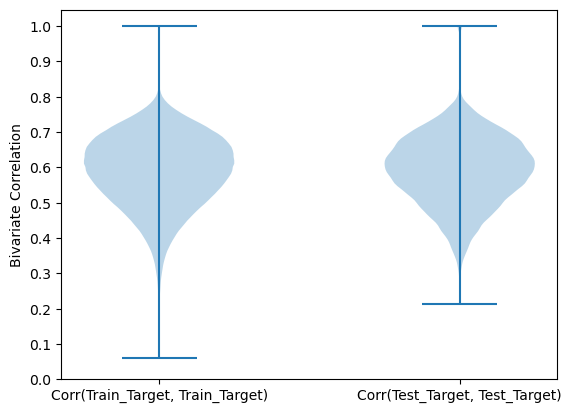

In [226]:
plt.violinplot([traintrain_Target_corrs, testtest_Target_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Target)', 'Corr(Test_Target, Test_Target)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

Correlation: 0.7587508274596867


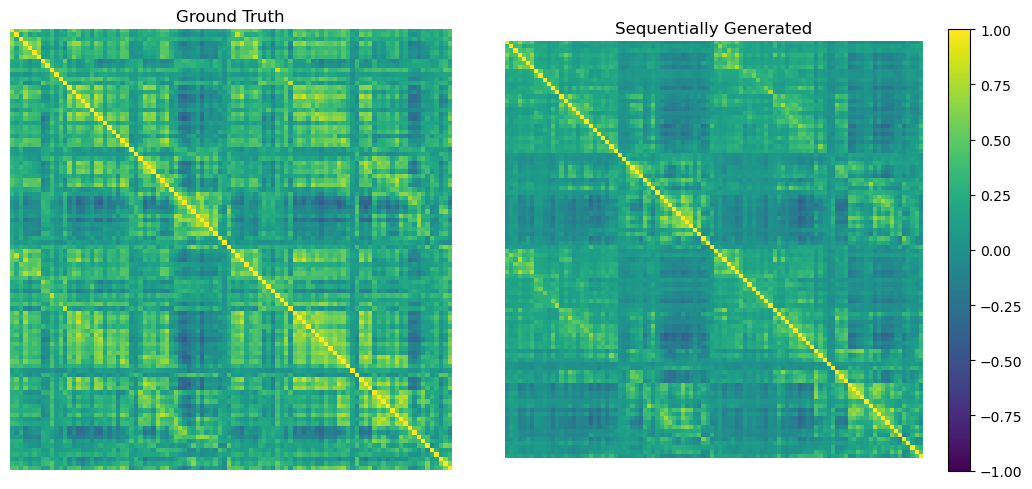

In [47]:
# TEST
show_subj_hemi(test_Target, test_pred, 4)

Correlation: 0.9499232863744121


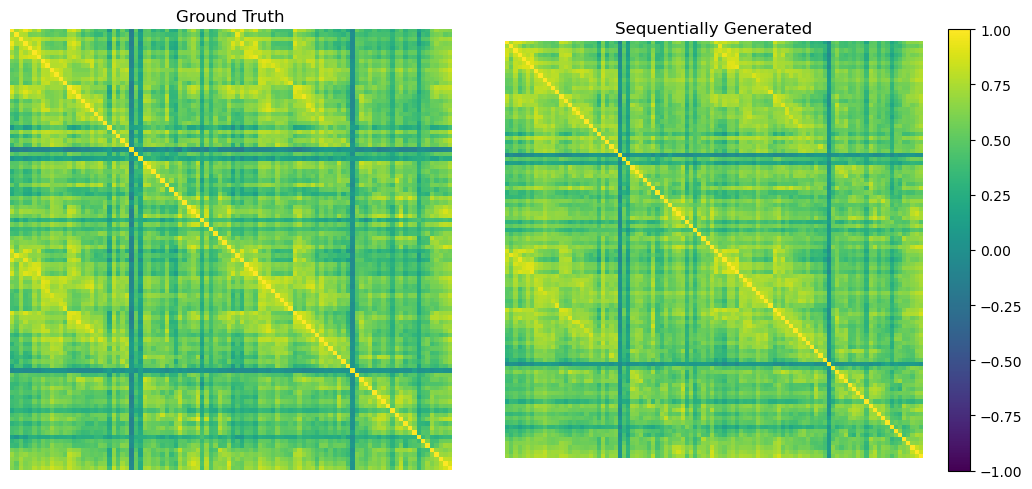

In [105]:
# TRAIN
show_subj_hemi(train_Target, train_pred, 3)


# Graph Transformer -- Brain Transformer

Number parameters: 341,948,472


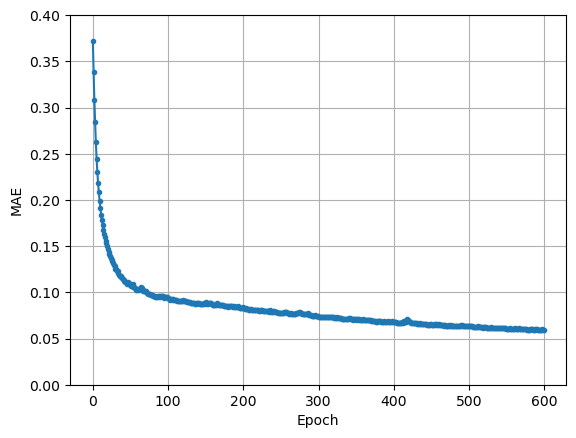

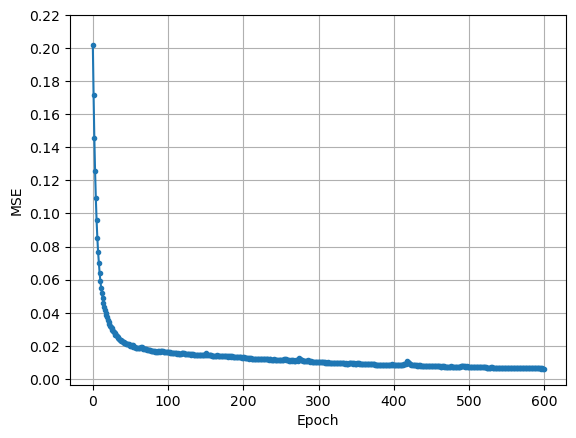

In [166]:
MAEs = [
    0.37195733189582825,
    0.3384280800819397,
    0.30849531292915344,
    0.28381142020225525,
    0.26250091195106506,
    0.24479906260967255,
    0.23017199337482452,
    0.2179405838251114,
    0.2080344557762146,
    0.19874559342861176,
    0.1910177618265152,
    0.18419310450553894,
    0.1783304363489151,
    0.1729552000761032,
    0.16764652729034424,
    0.163084477186203,
    0.1594647467136383,
    0.155960351228714,
    0.15328478813171387,
    0.1500876545906067,
    0.14673908054828644,
    0.14341382682323456,
    0.14125633239746094,
    0.1390029639005661,
    0.13703730702400208,
    0.13545463979244232,
    0.13360397517681122,
    0.1315523236989975,
    0.12945248186588287,
    0.12844067811965942,
    0.12558016180992126,
    0.12536533176898956,
    0.12334556132555008,
    0.12285088747739792,
    0.12083602696657181,
    0.11893018335103989,
    0.1181483194231987,
    0.11756524443626404,
    0.1165478527545929,
    0.11500594764947891,
    0.11477182060480118,
    0.11358460038900375,
    0.11204471439123154,
    0.11119278520345688,
    0.11128590255975723,
    0.11053619533777237,
    0.10910145938396454,
    0.1109461709856987,
    0.11017291992902756,
    0.10857286304235458,
    0.10764069110155106,
    0.10715280473232269,
    0.10826358199119568,
    0.10856081545352936,
    0.10593281686306,
    0.10549916326999664,
    0.10467733442783356,
    0.10347361117601395,
    0.10302159190177917,
    0.1029997318983078,
    0.10364120453596115,
    0.10329587012529373,
    0.10201157629489899,
    0.10343579947948456,
    0.10536108911037445,
    0.1045810654759407,
    0.10289366543292999,
    0.10184089839458466,
    0.10117366164922714,
    0.10160539299249649,
    0.10105667263269424,
    0.09987614303827286,
    0.09891516715288162,
    0.09817014634609222,
    0.09841301292181015,
    0.09828270226716995,
    0.09796979278326035,
    0.09730574488639832,
    0.09671533107757568,
    0.09675528854131699,
    0.09612064063549042,
    0.09598646312952042,
    0.09593117982149124,
    0.09518759697675705,
    0.09492624551057816,
    0.09479460120201111,
    0.09488426148891449,
    0.09549076110124588,
    0.09588905423879623,
    0.09528990834951401,
    0.0963161438703537,
    0.09591420739889145,
    0.09596193581819534,
    0.09644736349582672,
    0.09501258283853531,
    0.09434964507818222,
    0.09449098259210587,
    0.09468582272529602,
    0.0951036810874939,
    0.09453940391540527,
    0.0939931571483612,
    0.09266519546508789,
    0.09294775873422623,
    0.0916670635342598,
    0.0924542024731636,
    0.0929826945066452,
    0.09227529168128967,
    0.09220155328512192,
    0.09155628830194473,
    0.09217865020036697,
    0.09154441952705383,
    0.09150281548500061,
    0.09077533334493637,
    0.09096711874008179,
    0.09096404910087585,
    0.09019405394792557,
    0.09062902629375458,
    0.09080217033624649,
    0.09113652259111404,
    0.0909925177693367,
    0.09167017787694931,
    0.09095122665166855,
    0.09043809771537781,
    0.09033007174730301,
    0.09017087519168854,
    0.08959560841321945,
    0.09006533771753311,
    0.08983097225427628,
    0.0891401469707489,
    0.08908509463071823,
    0.08868905901908875,
    0.08842543512582779,
    0.08833613246679306,
    0.08887834846973419,
    0.08861089497804642,
    0.08842431008815765,
    0.08775084465742111,
    0.08769486844539642,
    0.08870244771242142,
    0.08795488625764847,
    0.08820528537034988,
    0.08813898265361786,
    0.08740098029375076,
    0.08724848181009293,
    0.08732708543539047,
    0.08709415793418884,
    0.08757398277521133,
    0.08706484735012054,
    0.08823291212320328,
    0.08844467997550964,
    0.08999645709991455,
    0.08687873184680939,
    0.08817830681800842,
    0.08787133544683456,
    0.08810531347990036,
    0.08814592659473419,
    0.08813576400279999,
    0.08826564997434616,
    0.0869145318865776,
    0.08590629696846008,
    0.08599512279033661,
    0.08596213907003403,
    0.08597420156002045,
    0.08652912825345993,
    0.08709657192230225,
    0.08803021162748337,
    0.08692701905965805,
    0.08619893342256546,
    0.08614745736122131,
    0.08633343130350113,
    0.08629325777292252,
    0.08667134493589401,
    0.08575224876403809,
    0.08575361967086792,
    0.08529394865036011,
    0.08471991121768951,
    0.08548259735107422,
    0.08560679852962494,
    0.0855008065700531,
    0.08553298562765121,
    0.08454903960227966,
    0.08516757190227509,
    0.08510057628154755,
    0.08475074917078018,
    0.08531857281923294,
    0.08553307503461838,
    0.08411850780248642,
    0.08418649435043335,
    0.08475937694311142,
    0.0844685435295105,
    0.08396609872579575,
    0.08432458341121674,
    0.08436786383390427,
    0.0850500836968422,
    0.0842975452542305,
    0.08330250531435013,
    0.08337774127721786,
    0.08320566266775131,
    0.08295434713363647,
    0.08377065509557724,
    0.08282285928726196,
    0.08284430205821991,
    0.08244313299655914,
    0.08250752836465836,
    0.08211544901132584,
    0.08206737786531448,
    0.0814724788069725,
    0.08135773986577988,
    0.08116111159324646,
    0.08186314254999161,
    0.08151981234550476,
    0.0810195654630661,
    0.0813857838511467,
    0.08094663918018341,
    0.08082874864339828,
    0.08081679791212082,
    0.0810842290520668,
    0.08087505400180817,
    0.0806288793683052,
    0.08109419792890549,
    0.08032818138599396,
    0.08007179945707321,
    0.07963799685239792,
    0.08032908290624619,
    0.08060795068740845,
    0.08057666569948196,
    0.08000362664461136,
    0.07989829778671265,
    0.07986946403980255,
    0.08012685179710388,
    0.0799337700009346,
    0.0798746645450592,
    0.0792885273694992,
    0.08006465435028076,
    0.07900303602218628,
    0.08041678369045258,
    0.08029147237539291,
    0.07901901751756668,
    0.07896976917982101,
    0.0789811983704567,
    0.07932793349027634,
    0.08003239333629608,
    0.07850964367389679,
    0.07858090102672577,
    0.07885612547397614,
    0.07835855334997177,
    0.07785592973232269,
    0.07758256047964096,
    0.07763484865427017,
    0.07814161479473114,
    0.07763054966926575,
    0.07799682021141052,
    0.07790864259004593,
    0.07768312841653824,
    0.07872828096151352,
    0.07895262539386749,
    0.07862915098667145,
    0.07836580276489258,
    0.07795285433530807,
    0.07767315208911896,
    0.07754601538181305,
    0.077006034553051,
    0.07688875496387482,
    0.07710085809230804,
    0.07692185044288635,
    0.07638908922672272,
    0.07657581567764282,
    0.07617858052253723,
    0.07675396651029587,
    0.07691536098718643,
    0.07790772616863251,
    0.07751556485891342,
    0.07724006474018097,
    0.07810302823781967,
    0.07839120179414749,
    0.07822959125041962,
    0.07736567407846451,
    0.07712617516517639,
    0.07670152187347412,
    0.07641053199768066,
    0.07612286508083344,
    0.0762452483177185,
    0.07635607570409775,
    0.07650181651115417,
    0.07687705010175705,
    0.076939657330513,
    0.07712200284004211,
    0.07564792782068253,
    0.07560144364833832,
    0.0751366913318634,
    0.07526875287294388,
    0.0745389312505722,
    0.07448603957891464,
    0.07436563074588776,
    0.07448048889636993,
    0.07495613396167755,
    0.0741599053144455,
    0.074277862906456,
    0.07432375848293304,
    0.07385687530040741,
    0.07369072735309601,
    0.07382924109697342,
    0.07364828884601593,
    0.07357372343540192,
    0.07376372814178467,
    0.07380477339029312,
    0.07319729775190353,
    0.07314042747020721,
    0.07320532947778702,
    0.0728536993265152,
    0.07275138795375824,
    0.07294227182865143,
    0.07293877005577087,
    0.07363452762365341,
    0.07311752438545227,
    0.07297003269195557,
    0.07314109802246094,
    0.07307467609643936,
    0.0728246346116066,
    0.07277596741914749,
    0.07289638370275497,
    0.07273364812135696,
    0.0719657763838768,
    0.07231514900922775,
    0.0729093849658966,
    0.07248566299676895,
    0.07236846536397934,
    0.07225091755390167,
    0.0722031220793724,
    0.07195466756820679,
    0.07217536866664886,
    0.07157614827156067,
    0.0714469626545906,
    0.07152625918388367,
    0.07142382115125656,
    0.07119077444076538,
    0.07136643677949905,
    0.07122733443975449,
    0.07134387642145157,
    0.07086175680160522,
    0.07184717059135437,
    0.0715370699763298,
    0.072053462266922,
    0.07110945880413055,
    0.07126016169786453,
    0.0710473507642746,
    0.07053053379058838,
    0.07124790549278259,
    0.07093362510204315,
    0.07046039402484894,
    0.07087922096252441,
    0.07127552479505539,
    0.0707833394408226,
    0.07113082706928253,
    0.06992948055267334,
    0.07022842764854431,
    0.07052428275346756,
    0.07021781802177429,
    0.0700395405292511,
    0.07084807753562927,
    0.0703984797000885,
    0.07037092000246048,
    0.07012808322906494,
    0.07013215869665146,
    0.06982924044132233,
    0.06975310295820236,
    0.06961584091186523,
    0.07015123963356018,
    0.07010792195796967,
    0.0697026401758194,
    0.0690455362200737,
    0.06899915635585785,
    0.06950127333402634,
    0.06922599673271179,
    0.06901063024997711,
    0.06881038844585419,
    0.06838765740394592,
    0.06844348460435867,
    0.06842044740915298,
    0.06844879686832428,
    0.06849276274442673,
    0.06893093883991241,
    0.0687464028596878,
    0.06809432804584503,
    0.06835643947124481,
    0.06792230904102325,
    0.06809990853071213,
    0.06846482306718826,
    0.06842128187417984,
    0.06802516430616379,
    0.06804045289754868,
    0.06788912415504456,
    0.06850318610668182,
    0.06833737343549728,
    0.06808488070964813,
    0.06813617050647736,
    0.06788311898708344,
    0.06888450682163239,
    0.06816749274730682,
    0.06837676465511322,
    0.06765230745077133,
    0.06772280484437943,
    0.06796198338270187,
    0.0673840343952179,
    0.06719733029603958,
    0.06707809865474701,
    0.06679731607437134,
    0.0668354406952858,
    0.06700742244720459,
    0.06691564619541168,
    0.06684467196464539,
    0.06758949160575867,
    0.06707898527383804,
    0.0685548260807991,
    0.06858491897583008,
    0.0680355653166771,
    0.0681384727358818,
    0.06909675151109695,
    0.07075923681259155,
    0.07025157660245895,
    0.06877503544092178,
    0.06825138628482819,
    0.06811437755823135,
    0.0671108290553093,
    0.06700044125318527,
    0.06701396405696869,
    0.06675263494253159,
    0.06682440638542175,
    0.06678856164216995,
    0.06674163788557053,
    0.06610237807035446,
    0.06660127639770508,
    0.0660589411854744,
    0.06616413593292236,
    0.06609174609184265,
    0.06661483645439148,
    0.06607610732316971,
    0.06577511876821518,
    0.06579625606536865,
    0.06602707505226135,
    0.06593857705593109,
    0.0655321404337883,
    0.06561094522476196,
    0.06541121006011963,
    0.06503544002771378,
    0.0649588331580162,
    0.06507296860218048,
    0.06516841053962708,
    0.06552272289991379,
    0.06588253378868103,
    0.06500375270843506,
    0.06489720940589905,
    0.06482917815446854,
    0.06442512571811676,
    0.06525377184152603,
    0.06530006974935532,
    0.0646970197558403,
    0.06525658071041107,
    0.06496923416852951,
    0.06509129703044891,
    0.06555087119340897,
    0.06468112766742706,
    0.06439866125583649,
    0.06412937492132187,
    0.06420952826738358,
    0.0644105076789856,
    0.0643358826637268,
    0.06381646543741226,
    0.06447132676839828,
    0.06402742117643356,
    0.06383798271417618,
    0.0639633908867836,
    0.06374669820070267,
    0.06415975093841553,
    0.06368724256753922,
    0.06345093250274658,
    0.06442844867706299,
    0.06367459148168564,
    0.06373068690299988,
    0.06389083713293076,
    0.06375546753406525,
    0.06388667225837708,
    0.06382706761360168,
    0.0637369230389595,
    0.06344346702098846,
    0.06349115073680878,
    0.06318102777004242,
    0.06323136389255524,
    0.06351781636476517,
    0.0646161139011383,
    0.06443629413843155,
    0.06380193680524826,
    0.06397321075201035,
    0.06360117346048355,
    0.06339865922927856,
    0.06392840296030045,
    0.06335028260946274,
    0.06380963325500488,
    0.06346353143453598,
    0.06347140669822693,
    0.06343507766723633,
    0.06325458735227585,
    0.06312456727027893,
    0.0632757693529129,
    0.06349121779203415,
    0.06296639889478683,
    0.06293510645627975,
    0.06251062452793121,
    0.06293593347072601,
    0.06240679696202278,
    0.06246513873338699,
    0.06235359609127045,
    0.06333643943071365,
    0.06254218518733978,
    0.06247398629784584,
    0.06209208816289902,
    0.06229787692427635,
    0.061929889023303986,
    0.06187494471669197,
    0.06257790327072144,
    0.06292969733476639,
    0.06260224431753159,
    0.06212598830461502,
    0.061623238027095795,
    0.06171313300728798,
    0.06122000142931938,
    0.061358742415905,
    0.06184306740760803,
    0.06188162788748741,
    0.06198501959443092,
    0.061836790293455124,
    0.06141434237360954,
    0.061743393540382385,
    0.06172347068786621,
    0.061489518731832504,
    0.0613592229783535,
    0.06123923882842064,
    0.06093241274356842,
    0.06152559816837311,
    0.06114728003740311,
    0.06167612224817276,
    0.061676274985075,
    0.06087053194642067,
    0.06113801151514053,
    0.06132080405950546,
    0.06102706491947174,
    0.060989245772361755,
    0.061170194298028946,
    0.060988232493400574,
    0.06073084473609924,
    0.060720294713974,
    0.060634028166532516,
    0.060640133917331696,
    0.060608964413404465,
    0.06085588037967682,
    0.0604083426296711,
    0.06041330471634865,
    0.06064743548631668,
    0.060758255422115326,
    0.06044233962893486,
    0.060594648122787476,
    0.061008185148239136,
    0.060450438410043716,
    0.06018542870879173,
    0.06053564324975014,
    0.060491327196359634,
    0.061049170792102814,
    0.06072382628917694,
    0.060457028448581696,
    0.0602710023522377,
    0.06020922213792801,
    0.060267940163612366,
    0.059979211539030075,
    0.06015884503722191,
    0.06026405468583107,
    0.0606217235326767,
    0.059961847960948944,
    0.05949459224939346,
    0.05966171622276306,
    0.05954466387629509,
    0.05963952839374542,
    0.05997978150844574,
    0.06007392704486847,
    0.06021260470151901,
    0.059829000383615494,
    0.05954009294509888,
    0.05974472314119339,
    0.059705693274736404,
    0.05989745631814003,
    0.0598832331597805,
    0.060065459460020065,
    0.05915191024541855,
    0.05961204320192337,
    0.059600066393613815,
    0.05950591340661049,
    0.05961382016539574,
    0.05942423641681671,
    0.059887323528528214,
    0.059178367257118225,
    0.059173375368118286,
]
MSEs = [
    0.2021019607782364,
    0.1716337651014328,
    0.14575497806072235,
    0.12542565166950226,
    0.10909119248390198,
    0.09578307718038559,
    0.0852024182677269,
    0.07665412873029709,
    0.06990177184343338,
    0.06412095576524734,
    0.059249117970466614,
    0.05518548563122749,
    0.05185751989483833,
    0.04885895550251007,
    0.04598689451813698,
    0.04362531006336212,
    0.04169812053442001,
    0.039939071983098984,
    0.03866254910826683,
    0.037087537348270416,
    0.03560074418783188,
    0.03413388878107071,
    0.0331297293305397,
    0.032059915363788605,
    0.031220346689224243,
    0.03042828105390072,
    0.029614189639687538,
    0.02886572852730751,
    0.028048742562532425,
    0.027574066072702408,
    0.026602404192090034,
    0.026413653045892715,
    0.025659531354904175,
    0.0254086721688509,
    0.024732155725359917,
    0.023991411551833153,
    0.023635299876332283,
    0.023380102589726448,
    0.023078523576259613,
    0.02257627062499523,
    0.022488312795758247,
    0.022011682391166687,
    0.021525638177990913,
    0.021373186260461807,
    0.0212747510522604,
    0.021033011376857758,
    0.020718013867735863,
    0.02105347253382206,
    0.020775338634848595,
    0.020401015877723694,
    0.02005556970834732,
    0.019867554306983948,
    0.02014821395277977,
    0.020245108753442764,
    0.019503751769661903,
    0.019336871802806854,
    0.01910129189491272,
    0.018776079639792442,
    0.018663596361875534,
    0.0187420342117548,
    0.018869975581765175,
    0.018764391541481018,
    0.01842883601784706,
    0.01876750774681568,
    0.01935659535229206,
    0.019080817699432373,
    0.018568413332104683,
    0.018287675455212593,
    0.018034452572464943,
    0.01821819320321083,
    0.0180699210613966,
    0.017717737704515457,
    0.01741103269159794,
    0.01719665713608265,
    0.017242420464754105,
    0.017223328351974487,
    0.017170818522572517,
    0.017017245292663574,
    0.016855916008353233,
    0.016874872148036957,
    0.016625838354229927,
    0.016562126576900482,
    0.01658470742404461,
    0.01637054607272148,
    0.01632336527109146,
    0.016292255371809006,
    0.01634230650961399,
    0.01648883707821369,
    0.016554802656173706,
    0.016404151916503906,
    0.0166226364672184,
    0.01656225137412548,
    0.01657048612833023,
    0.016727764159440994,
    0.016432732343673706,
    0.016213539987802505,
    0.016312522813677788,
    0.016275767236948013,
    0.016436155885457993,
    0.016335833817720413,
    0.016114285215735435,
    0.01599421538412571,
    0.015899915248155594,
    0.015654541552066803,
    0.015682723373174667,
    0.015806211158633232,
    0.015634093433618546,
    0.015642937272787094,
    0.015560831874608994,
    0.01563497819006443,
    0.015434922650456429,
    0.01539725624024868,
    0.015209012664854527,
    0.015320094302296638,
    0.015256076119840145,
    0.015116710215806961,
    0.015237371437251568,
    0.015237913466989994,
    0.0152825228869915,
    0.015303477644920349,
    0.015450325794517994,
    0.015334395691752434,
    0.015212553553283215,
    0.01515417080372572,
    0.015084304846823215,
    0.01496800035238266,
    0.014958498999476433,
    0.014942944049835205,
    0.014800895005464554,
    0.014831911772489548,
    0.014751071110367775,
    0.014649610966444016,
    0.014674928039312363,
    0.014751208946108818,
    0.014661086723208427,
    0.01458438578993082,
    0.014373489655554295,
    0.014343034476041794,
    0.014573638327419758,
    0.014517398551106453,
    0.014579192735254765,
    0.014549828134477139,
    0.014366372488439083,
    0.014262853190302849,
    0.014340450055897236,
    0.014218112453818321,
    0.014398470520973206,
    0.014198901131749153,
    0.014595224522054195,
    0.01464169193059206,
    0.01528520230203867,
    0.014344047755002975,
    0.014513714239001274,
    0.014424357563257217,
    0.014401622116565704,
    0.014382464811205864,
    0.014400023967027664,
    0.014437037520110607,
    0.014026891440153122,
    0.013840935193002224,
    0.013859163038432598,
    0.013882164843380451,
    0.013872785493731499,
    0.01393173448741436,
    0.014053761959075928,
    0.014254475943744183,
    0.014041039161384106,
    0.014037072658538818,
    0.013994427397847176,
    0.013991373591125011,
    0.013928098604083061,
    0.013987856917083263,
    0.013706941157579422,
    0.013732511550188065,
    0.013720107264816761,
    0.013534624129533768,
    0.013660191558301449,
    0.013781112618744373,
    0.013644187711179256,
    0.013622467406094074,
    0.013425972312688828,
    0.013576028868556023,
    0.013491876423358917,
    0.013451676815748215,
    0.01347384974360466,
    0.013508240692317486,
    0.013216952793300152,
    0.013254646211862564,
    0.013301549479365349,
    0.013241719454526901,
    0.0131500493735075,
    0.013175413943827152,
    0.01320592500269413,
    0.013251724652945995,
    0.013150173239409924,
    0.012924904003739357,
    0.012892291881144047,
    0.012916173785924911,
    0.012753169052302837,
    0.01298991683870554,
    0.012805791571736336,
    0.01286572776734829,
    0.012834787368774414,
    0.012803868390619755,
    0.012585850432515144,
    0.012586066499352455,
    0.01240442506968975,
    0.012364357709884644,
    0.012230534106492996,
    0.012360834516584873,
    0.012330939993262291,
    0.012206156738102436,
    0.01221149880439043,
    0.01216651126742363,
    0.012152139097452164,
    0.012155222706496716,
    0.012195232324302197,
    0.012165733613073826,
    0.012058869935572147,
    0.012229103595018387,
    0.011979424394667149,
    0.011950267478823662,
    0.011791899800300598,
    0.01195105817168951,
    0.012021688744425774,
    0.01203643437474966,
    0.011832332238554955,
    0.011873668059706688,
    0.011843265034258366,
    0.01207527332007885,
    0.012023510411381721,
    0.012210378423333168,
    0.011757143773138523,
    0.011881084181368351,
    0.01155504584312439,
    0.012049463577568531,
    0.011751137673854828,
    0.011560985818505287,
    0.011510278098285198,
    0.011522941291332245,
    0.011620644479990005,
    0.011655841022729874,
    0.011366691440343857,
    0.0114449979737401,
    0.01146937720477581,
    0.011274726130068302,
    0.011236036196351051,
    0.011151043698191643,
    0.011218050494790077,
    0.011417028494179249,
    0.011167259886860847,
    0.011217608116567135,
    0.011220941320061684,
    0.011259256862103939,
    0.012036408297717571,
    0.011736971326172352,
    0.01172832865267992,
    0.01136824581772089,
    0.011566718108952045,
    0.011190078221261501,
    0.011052289977669716,
    0.010938627645373344,
    0.010947465896606445,
    0.0110761234536767,
    0.011049165390431881,
    0.01085065957158804,
    0.01117008924484253,
    0.010808698832988739,
    0.010865679010748863,
    0.010994961485266685,
    0.011459589004516602,
    0.011094249784946442,
    0.010884661227464676,
    0.011300996877253056,
    0.012266697362065315,
    0.012120211496949196,
    0.011379723437130451,
    0.01139139849692583,
    0.01124939788132906,
    0.011003619991242886,
    0.010826672427356243,
    0.010914863087236881,
    0.010942298918962479,
    0.010944049805402756,
    0.010913388803601265,
    0.0109113659709692,
    0.011052463203668594,
    0.010541309602558613,
    0.010605820454657078,
    0.010429699905216694,
    0.010472714900970459,
    0.010276056826114655,
    0.010230958461761475,
    0.010198173113167286,
    0.01020438689738512,
    0.01028683502227068,
    0.010139617137610912,
    0.010117560625076294,
    0.010123775340616703,
    0.010021395049989223,
    0.009929497726261616,
    0.010063255205750465,
    0.01004189532250166,
    0.009935809299349785,
    0.01000228337943554,
    0.009964982978999615,
    0.009838953614234924,
    0.009933107532560825,
    0.009853800758719444,
    0.009723869152367115,
    0.00974100362509489,
    0.009713437408208847,
    0.009669200517237186,
    0.009867827408015728,
    0.009714728221297264,
    0.009702909737825394,
    0.009681560099124908,
    0.009680207818746567,
    0.009632824920117855,
    0.009618151932954788,
    0.009663311764597893,
    0.009619330987334251,
    0.00946812517940998,
    0.009554916061460972,
    0.009799600578844547,
    0.009550030343234539,
    0.00950468610972166,
    0.009415618143975735,
    0.009449619799852371,
    0.009398333728313446,
    0.009436627849936485,
    0.009399337694048882,
    0.009267836809158325,
    0.009259489364922047,
    0.009269723668694496,
    0.009138857014477253,
    0.009290921501815319,
    0.009179743938148022,
    0.009170959703624249,
    0.00915013998746872,
    0.009669185616075993,
    0.009623181074857712,
    0.009736905805766582,
    0.009449723176658154,
    0.009348017163574696,
    0.009350319392979145,
    0.009218582883477211,
    0.009307172149419785,
    0.009168333373963833,
    0.009032782167196274,
    0.009031366556882858,
    0.00950628798455,
    0.009273727424442768,
    0.009356284514069557,
    0.008988140150904655,
    0.00894282478839159,
    0.009144184179604053,
    0.008984137326478958,
    0.008969391696155071,
    0.009103916585445404,
    0.008933739736676216,
    0.008937882259488106,
    0.008843401446938515,
    0.00887157954275608,
    0.008917391300201416,
    0.008797921240329742,
    0.008713546209037304,
    0.008852675557136536,
    0.008867062628269196,
    0.008948625065386295,
    0.008734915405511856,
    0.008645926602184772,
    0.008688908070325851,
    0.00867473054677248,
    0.008626515977084637,
    0.008582609705626965,
    0.00843215361237526,
    0.008495240472257137,
    0.008521336130797863,
    0.00843850988894701,
    0.008454995229840279,
    0.00844662357121706,
    0.008454631082713604,
    0.008368556387722492,
    0.00845178309828043,
    0.008249430917203426,
    0.008342724293470383,
    0.008455697447061539,
    0.008471551351249218,
    0.00838453695178032,
    0.008317125029861927,
    0.008326628245413303,
    0.008465886116027832,
    0.008358730003237724,
    0.008275714702904224,
    0.008394782431423664,
    0.008362339809536934,
    0.008871231228113174,
    0.008497281931340694,
    0.008597527630627155,
    0.008340440690517426,
    0.008337247185409069,
    0.00839908979833126,
    0.008167658932507038,
    0.008106871508061886,
    0.008094826713204384,
    0.008100059814751148,
    0.008067653514444828,
    0.008103515021502972,
    0.008089954033493996,
    0.00805891677737236,
    0.008230673149228096,
    0.008049847558140755,
    0.008802998811006546,
    0.00881626270711422,
    0.008998678997159004,
    0.008672414347529411,
    0.009489915333688259,
    0.010648950934410095,
    0.010368174873292446,
    0.009410346858203411,
    0.00883006677031517,
    0.008776461705565453,
    0.00838689599186182,
    0.008359347470104694,
    0.008334144949913025,
    0.008155728690326214,
    0.008136422373354435,
    0.008256237953901291,
    0.008245895616710186,
    0.008010316640138626,
    0.008182927966117859,
    0.007997339591383934,
    0.008042608387768269,
    0.007893512956798077,
    0.008058295585215092,
    0.00786491297185421,
    0.00784439779818058,
    0.007819995284080505,
    0.00788151752203703,
    0.007838278077542782,
    0.007793181575834751,
    0.007775200065225363,
    0.0077176145277917385,
    0.007685815449804068,
    0.00763529259711504,
    0.007646762765944004,
    0.007617330644279718,
    0.007730202283710241,
    0.0077583035454154015,
    0.007553700357675552,
    0.0076163532212376595,
    0.0075673251412808895,
    0.007456433959305286,
    0.007760954555124044,
    0.007799214217811823,
    0.007608924061059952,
    0.007656128145754337,
    0.007623710669577122,
    0.007552624214440584,
    0.0076768589206039906,
    0.007481754291802645,
    0.0073935287073254585,
    0.007355536334216595,
    0.007416066713631153,
    0.00742330914363265,
    0.0074622007086873055,
    0.007314731832593679,
    0.00738756125792861,
    0.0073610758408904076,
    0.007266614120453596,
    0.007331387139856815,
    0.007220105268061161,
    0.007336323615163565,
    0.007274780422449112,
    0.007246078457683325,
    0.007534909527748823,
    0.007292407099157572,
    0.00730687752366066,
    0.007302943151444197,
    0.007360265590250492,
    0.00735447695478797,
    0.007332260720431805,
    0.007263700012117624,
    0.00720083387568593,
    0.007195040117949247,
    0.007159679662436247,
    0.007161545101553202,
    0.0073009151965379715,
    0.007815280929207802,
    0.007912124507129192,
    0.007428146433085203,
    0.007615944370627403,
    0.007446246221661568,
    0.007372192107141018,
    0.007504669483751059,
    0.007311305962502956,
    0.007453739643096924,
    0.0073380013927817345,
    0.007298655342310667,
    0.007352340966463089,
    0.007370444014668465,
    0.007220836356282234,
    0.00723708001896739,
    0.007371175102889538,
    0.0071859476156532764,
    0.007143402937799692,
    0.007004729472100735,
    0.007046123500913382,
    0.007009940687566996,
    0.00697320094332099,
    0.006918194238096476,
    0.007302193436771631,
    0.007063898257911205,
    0.0070472355000674725,
    0.006995264440774918,
    0.006933584343641996,
    0.006843092851340771,
    0.006838763598352671,
    0.006928978953510523,
    0.007032515946775675,
    0.006954801268875599,
    0.00685465382412076,
    0.006789386738091707,
    0.0067911348305642605,
    0.00668844161555171,
    0.0067101954482495785,
    0.006784019526094198,
    0.0067758415825665,
    0.006850207690149546,
    0.006904342211782932,
    0.006737089715898037,
    0.006789816077798605,
    0.006794261280447245,
    0.006761350203305483,
    0.006740367505699396,
    0.006649974267929792,
    0.006618074607104063,
    0.006695781368762255,
    0.006639872211962938,
    0.006687138229608536,
    0.006729688961058855,
    0.0065950872376561165,
    0.006690794136375189,
    0.006699514575302601,
    0.006565932650119066,
    0.006614550016820431,
    0.006654021330177784,
    0.006595623213797808,
    0.006513745523989201,
    0.006516032852232456,
    0.006519847549498081,
    0.006523825693875551,
    0.00647357665002346,
    0.006530296988785267,
    0.006465950980782509,
    0.006447388790547848,
    0.0065253074280917645,
    0.006622621789574623,
    0.0064910477958619595,
    0.006557879038155079,
    0.0066126566380262375,
    0.006471327506005764,
    0.006451213266700506,
    0.006520665250718594,
    0.006512000225484371,
    0.006580309011042118,
    0.006555700674653053,
    0.006504274904727936,
    0.006489332299679518,
    0.006476567126810551,
    0.006443141959607601,
    0.006385670509189367,
    0.0064261374063789845,
    0.006385148502886295,
    0.0064317211508750916,
    0.006322119850665331,
    0.006251759827136993,
    0.006290594581514597,
    0.0062646581791341305,
    0.006323939189314842,
    0.006371185649186373,
    0.0063547310419380665,
    0.006390460766851902,
    0.006287917960435152,
    0.006219056434929371,
    0.006291468162089586,
    0.006274201907217503,
    0.006298476364463568,
    0.0063263229094445705,
    0.006397854071110487,
    0.006212918553501368,
    0.006259762682020664,
    0.00626574968919158,
    0.006219492293894291,
    0.0062715052627027035,
    0.006179942283779383,
    0.006264976691454649,
    0.006192351691424847,
    0.00617671012878418,
]

print("Number parameters: 341,948,472")
plot_training_losses(MAEs, range=np.arange(0, 0.41, 0.05))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.23, 0.02))

In [227]:
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/train_pred.npy")

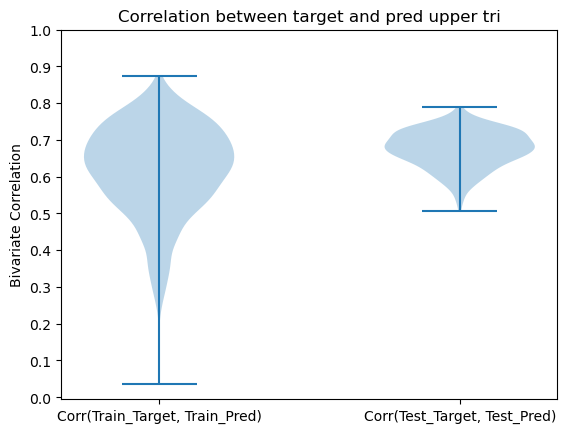

In [257]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :, :][np.triu_indices_from(test_Target[i, :, :], k=-1)], test_pred[i, :, :][np.triu_indices_from(test_pred[i, :, :], k=-1)])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :, :][np.triu_indices_from(train_Target[i, :, :], k=-1)], train_pred[i, :, :][np.triu_indices_from(train_pred[i, :, :], k=-1)])
    train_corrs.append(corr[0,1])

# UPPER TRIANGLE
plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Correlation between target and pred upper tri")
plt.show()

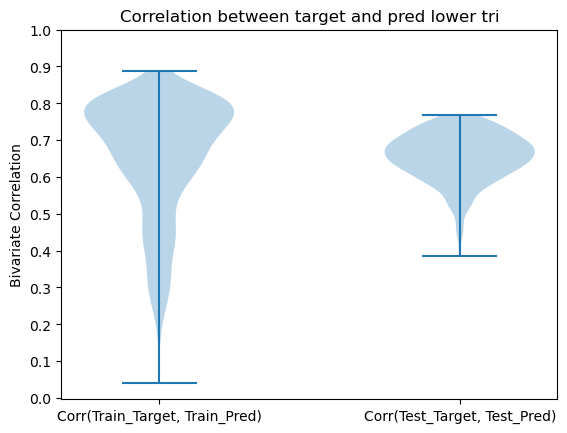

In [258]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :, :][np.tril_indices_from(test_Target[i, :, :], k=-1)], test_pred[i, :, :][np.tril_indices_from(test_pred[i, :, :], k=-1)])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :, :][np.tril_indices_from(train_Target[i, :, :], k=-1)], train_pred[i, :, :][np.tril_indices_from(train_pred[i, :, :], k=-1)])
    train_corrs.append(corr[0,1])

# LOWERE TRIANGLE
plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Correlation between target and pred lower tri")
plt.show()

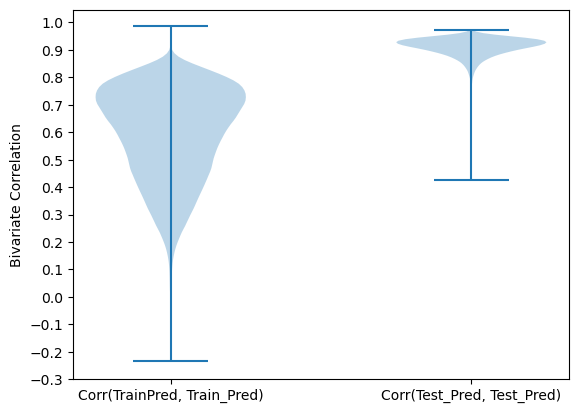

In [255]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(get_lower_tris(train_pred))
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(get_lower_tris(test_pred))
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(-0.3, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

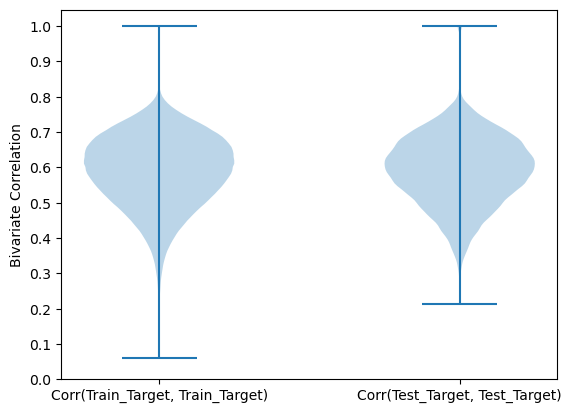

In [256]:
# Corr(train_Target, train_grountruth)
corr = np.corrcoef(get_lower_tris(train_Target))
traintrain_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_Target, test_Target)
corr = np.corrcoef(get_lower_tris(test_Target))
testtest_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_Target_corrs, testtest_Target_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Target)', 'Corr(Test_Target, Test_Target)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

Upper triangle correlation: 0.5924281483560241
Lower triangle correlation: 0.6706163460498844


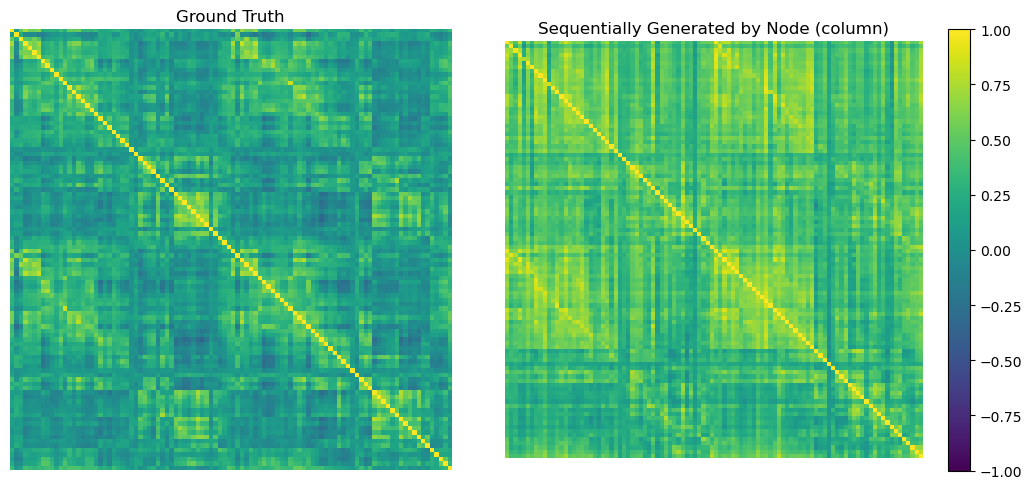

In [259]:
# TEST
show_subj_hemi_made(test_Target, test_pred, 0)

Upper triangle correlation: 0.498193364319562
Lower triangle correlation: 0.7564680578903515


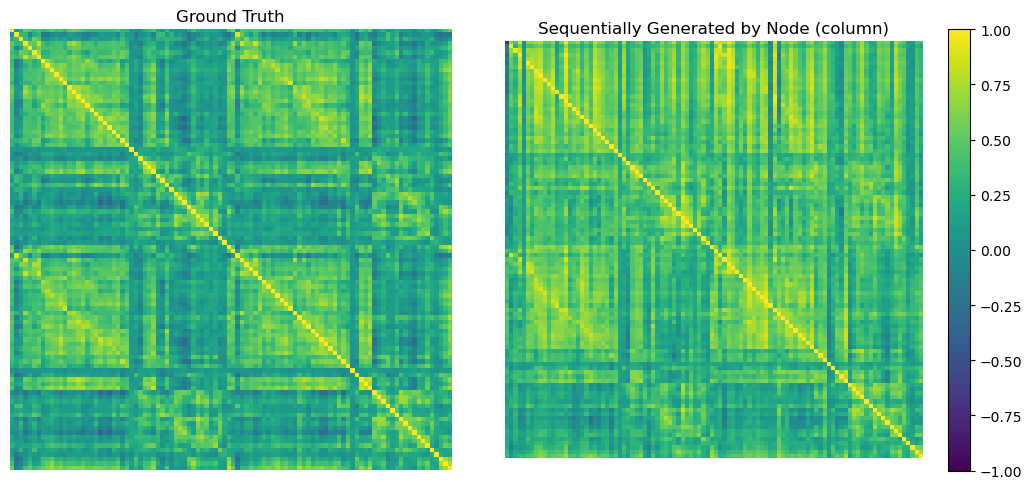

In [260]:
# TRAIN
show_subj_hemi_made(train_Target, train_pred, 0)

# TriuGraphTransformer

In [161]:
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/TriuGraphModel/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/TriuGraphModel/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/TriuGraphModel/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/TriuGraphModel/train_pred.npy")

In [ ]:
def triu_graph_greedy_decode(model, source, latent_length, device, b=1):
    encoder_output = model.encode(source)
    decoder_input = torch.ones(b, latent_length, latent_length).to(device)
    decoder_mask = generate_subsequent_mask(model.latent_length).to(device)

    counter = 1
    for i in increasing_steps(0, range(2, 100+1)):
        indices = []
        out = model.decode(encoder_out=encoder_output, tgt=decoder_input, tgt_mask=decoder_mask)

        for j in increasing_steps(i, range(counter, 100)):
            indices.append(int(j))

        decoder_input[:, i+2, 2:] = torch.tensor(out[indices])
        decoder_input[:, 2:, i+2] = torch.tensor(out[indices])
        

        counter +=1


    return decoder_input, out

In [164]:
import torch
from utils import *

In [181]:
decoder_input = torch.ones(1, 102, 102)

counter = 1
for x, i in enumerate(increasing_steps(0, range(2, 100+1))):
    indices = []
    out = train_Target[0, :]

    for j in increasing_steps(i, range(counter, 100)):
        indices.append(int(j))

    # Copy the upper triangle to the corresponding lower triangle
    decoder_input[:, x+2, x+3:] = torch.tensor(out[indices])
    decoder_input[:, x+3:, x+2] = torch.tensor(out[indices])

    counter +=1

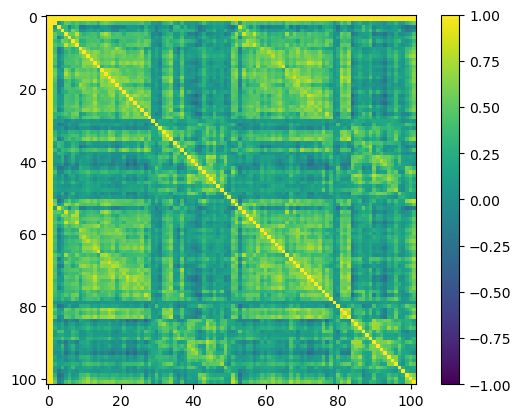

In [186]:
plt.imshow(decoder_input[0, :, :], vmin = -1, vmax = 1)
plt.colorbar()

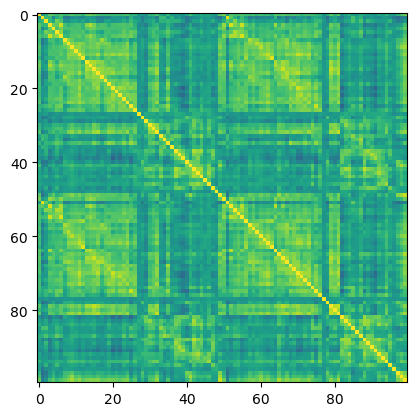

In [188]:
plt.imshow(make_netmat(train_Target[0, :]), vmin=-1, vmax=1)

Correlation: -0.00948411286654145


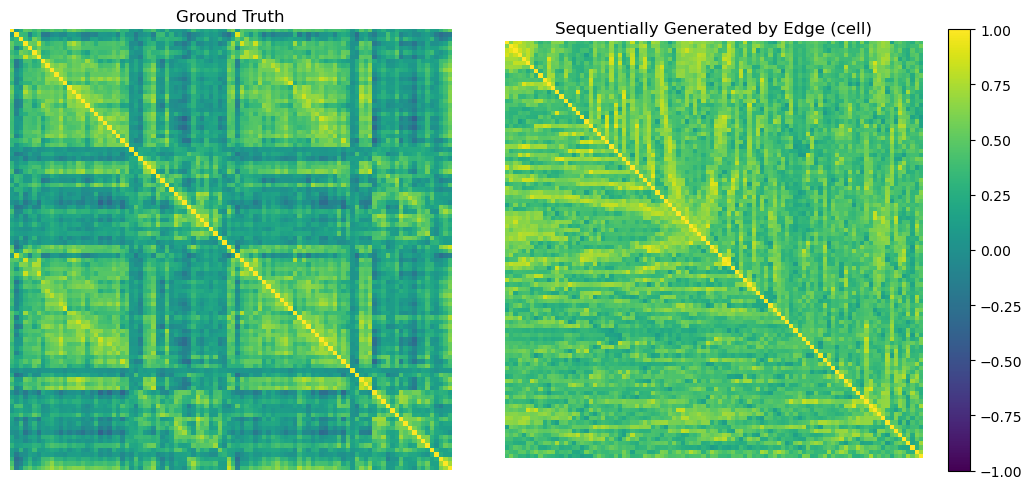

In [64]:
show_subj_hemi(train_Target, train_pred, 0)

# MassiveConv

Seems to be doing just as well as LargeConv


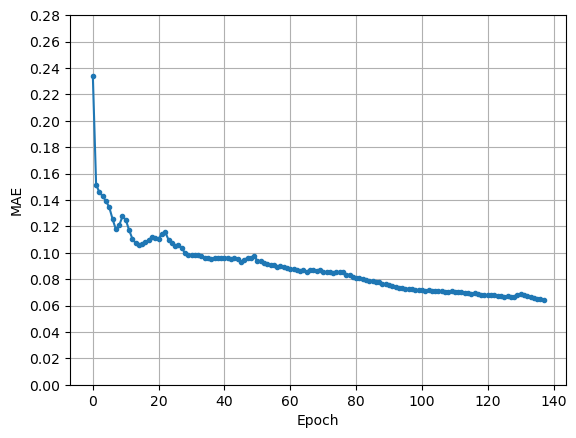

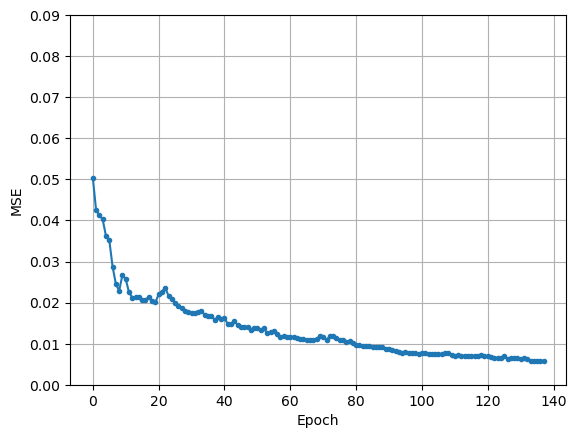

In [20]:
MAEs = [
    0.23416471,
    0.15161736,
    0.1456759,
    0.14290822,
    0.13909975,
    0.13436384,
    0.12549236,
    0.117699176,
    0.12067188,
    0.12744427,
    0.12504242,
    0.1173094,
    0.11067223,
    0.10728972,
    0.106224194,
    0.10664888,
    0.10811023,
    0.10940113,
    0.11220448,
    0.11102252,
    0.11073677,
    0.11454317,
    0.11557887,
    0.109828405,
    0.10764552,
    0.10521085,
    0.10576368,
    0.10369972,
    0.09965033,
    0.098553024,
    0.09809066,
    0.09864754,
    0.098268434,
    0.097152635,
    0.09587514,
    0.095720775,
    0.09545017,
    0.0956794,
    0.09626559,
    0.09625823,
    0.0963362,
    0.096209064,
    0.09494499,
    0.095807984,
    0.095439926,
    0.09285053,
    0.09444361,
    0.09630666,
    0.09592951,
    0.097730465,
    0.09367298,
    0.09365265,
    0.09186583,
    0.0914345,
    0.09059817,
    0.09100275,
    0.08917074,
    0.08957321,
    0.089018695,
    0.0881414,
    0.08766361,
    0.0875529,
    0.0869675,
    0.086318664,
    0.086876325,
    0.08570972,
    0.08713133,
    0.08685732,
    0.08599965,
    0.087243944,
    0.08509575,
    0.085160926,
    0.085244656,
    0.08464416,
    0.08503729,
    0.085052505,
    0.085042894,
    0.08345922,
    0.08319404,
    0.08153449,
    0.08117166,
    0.080930084,
    0.080187075,
    0.07962953,
    0.07869388,
    0.078580774,
    0.07818317,
    0.077503316,
    0.07662095,
    0.07613973,
    0.07589135,
    0.07469824,
    0.07396197,
    0.07331432,
    0.072901934,
    0.07272928,
    0.07256526,
    0.072283134,
    0.0719083,
    0.07169997,
    0.071398966,
    0.07124821,
    0.0715408,
    0.07127833,
    0.07076301,
    0.071046345,
    0.07075117,
    0.07033232,
    0.070489526,
    0.0708522,
    0.07042184,
    0.07047451,
    0.0705165,
    0.06949721,
    0.06918311,
    0.06909876,
    0.06917234,
    0.068506345,
    0.06783582,
    0.06774374,
    0.06775766,
    0.06777054,
    0.06761127,
    0.06708637,
    0.066958055,
    0.06682042,
    0.066840574,
    0.06671454,
    0.06683219,
    0.0682251,
    0.06890346,
    0.067973025,
    0.06728436,
    0.06633824,
    0.06573292,
    0.065018624,
    0.064665705,
    0.06441881,
]
MSEs = [
    0.05042571201920509,
    0.04243849590420723,
    0.041288960725069046,
    0.04023289307951927,
    0.03618393465876579,
    0.03524310886859894,
    0.028761962428689003,
    0.024558722972869873,
    0.022861871868371964,
    0.02672925405204296,
    0.025691689923405647,
    0.02248971536755562,
    0.021228739991784096,
    0.021330630406737328,
    0.02139977365732193,
    0.020569216459989548,
    0.020750539377331734,
    0.021310070529580116,
    0.02046223357319832,
    0.020059343427419662,
    0.02199893817305565,
    0.022634681314229965,
    0.023654403164982796,
    0.021630950272083282,
    0.020904602482914925,
    0.019901057705283165,
    0.01924002170562744,
    0.01861603558063507,
    0.017911529168486595,
    0.017604369670152664,
    0.017423920333385468,
    0.01755673624575138,
    0.017678705975413322,
    0.01805156096816063,
    0.017005082219839096,
    0.016790315508842468,
    0.01673378050327301,
    0.015861751511693,
    0.01642458140850067,
    0.016111651435494423,
    0.016257574781775475,
    0.014753070659935474,
    0.014751747250556946,
    0.015412088483572006,
    0.014590407721698284,
    0.014154664240777493,
    0.014093540608882904,
    0.014097404666244984,
    0.01335238292813301,
    0.013805023394525051,
    0.013770551420748234,
    0.013344568200409412,
    0.013707808218896389,
    0.012566490098834038,
    0.012905096635222435,
    0.013189930468797684,
    0.012439724057912827,
    0.011730247177183628,
    0.011762251146137714,
    0.011702844873070717,
    0.01172629464417696,
    0.011598512530326843,
    0.01142959389835596,
    0.011097469367086887,
    0.011235064826905727,
    0.010819937102496624,
    0.010782735422253609,
    0.010971689596772194,
    0.011145024560391903,
    0.011865748092532158,
    0.011586091481149197,
    0.010948557406663895,
    0.011777023784816265,
    0.011882671155035496,
    0.011303558945655823,
    0.010882441885769367,
    0.011011723428964615,
    0.010403315536677837,
    0.01061956025660038,
    0.010114449076354504,
    0.009703481569886208,
    0.009601606987416744,
    0.009523154236376286,
    0.009376478381454945,
    0.009311957284808159,
    0.009251394309103489,
    0.009073109365999699,
    0.009207900613546371,
    0.009136773645877838,
    0.008766906335949898,
    0.008592365309596062,
    0.008338241837918758,
    0.008102726191282272,
    0.007942922413349152,
    0.007809655740857124,
    0.007849687710404396,
    0.007775602862238884,
    0.007808379363268614,
    0.007745723705738783,
    0.007510261610150337,
    0.0076479120180010796,
    0.0076772915199398994,
    0.007458720356225967,
    0.00748512102290988,
    0.007380882743746042,
    0.007363796234130859,
    0.007420355454087257,
    0.007614699192345142,
    0.007776198443025351,
    0.007341369986534119,
    0.0070848166942596436,
    0.007160545326769352,
    0.007062830962240696,
    0.007050002925097942,
    0.006965558510273695,
    0.00704829441383481,
    0.007006694562733173,
    0.006873044651001692,
    0.007236078381538391,
    0.006908650044351816,
    0.006944497115910053,
    0.006727780215442181,
    0.006450933404266834,
    0.006550555117428303,
    0.006387754343450069,
    0.006916153244674206,
    0.006362707819789648,
    0.006520566996186972,
    0.0065411049872636795,
    0.006523663178086281,
    0.006343469489365816,
    0.0064953286200761795,
    0.006177891977131367,
    0.005884344223886728,
    0.005837943870574236,
    0.005803847685456276,
    0.005761368665844202,
    0.005714789964258671,
]

print("Seems to be doing just as well as LargeConv")
plot_training_losses(MAEs, range=np.arange(0, 0.29, 0.02))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.1, 0.01))

# Permuted Labels -- LargeConv Model (permuted only subjects labels)

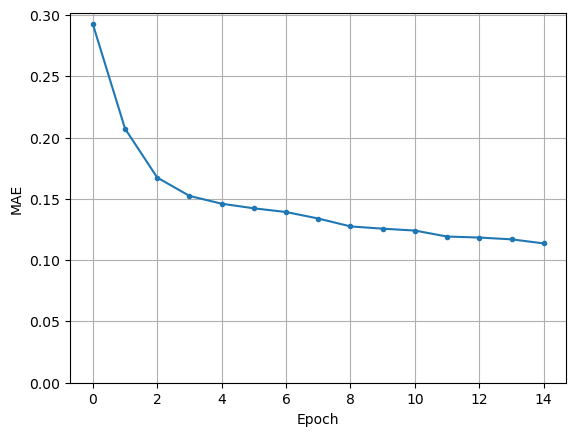

In [25]:
permuted_MAEs = [0.29256663, 0.20725083, 0.16735975, 0.15241235, 0.14602923, 0.14227794, 0.13924822, 0.13394593, 0.12752366, 0.12566021, 0.12413106, 0.11925285, 0.11843768, 0.1169662, 0.11364503]
plot_training_losses(permuted_MAEs, range=np.arange(0, 0.31, 0.05))


In [48]:
# load_data
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/train_pred.npy")

Correlation: 0.67190825433214


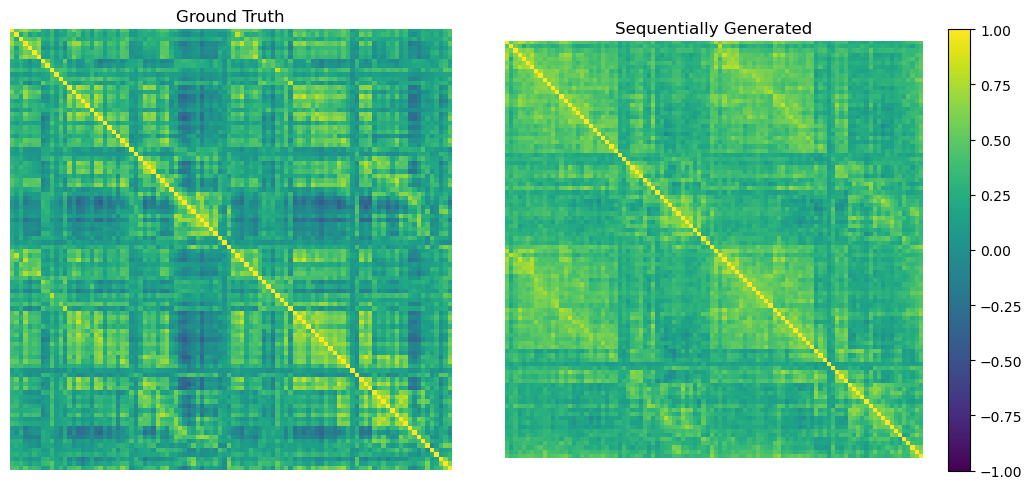

In [49]:
show_subj_hemi(test_Target, test_pred, 4)
## TEST SUBJ

Correlation: 0.7787618761624242


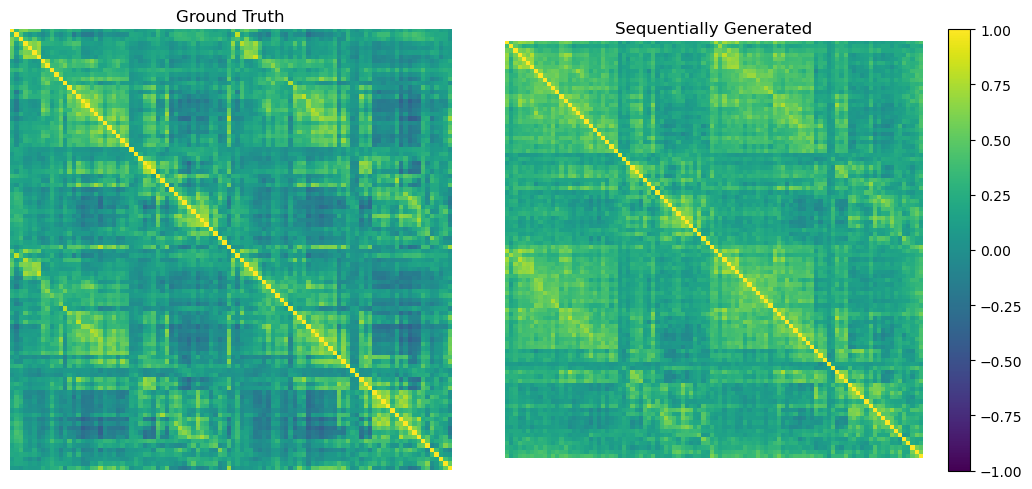

In [35]:
show_subj_hemi(train_Target, train_pred, 4)
# TRAIN SUBJ

In [33]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

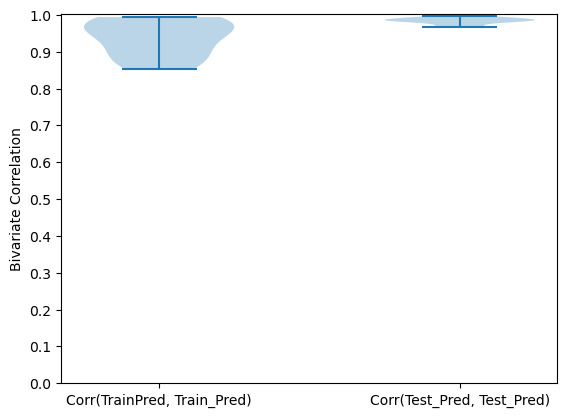

In [34]:
plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

# Full Permutation -- LargeConv (permuted individual edges between subjects)

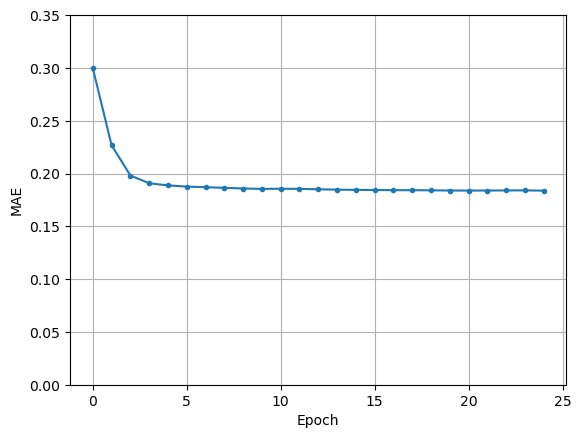

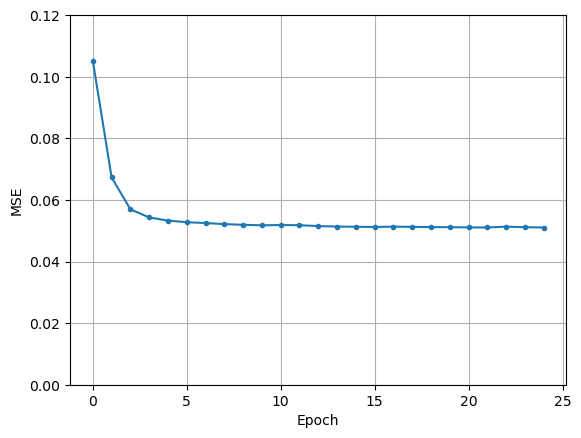

In [8]:
permuted_MAEs = [
    0.2996526,
    0.22671121,
    0.19809021,
    0.19078603,
    0.18874691,
    0.18759021,
    0.18705338,
    0.1864331,
    0.18581612,
    0.18546163,
    0.18558273,
    0.18546997,
    0.18508084,
    0.18472947,
    0.18451402,
    0.18436967,
    0.18422787,
    0.18420589,
    0.18408634,
    0.18390664,
    0.18386318,
    0.18386845,
    0.18399645,
    0.18404679,
    0.18376495,
]
permuted_MSEs = [
    0.10514433681964874,
    0.06732634454965591,
    0.05694498121738434,
    0.054317373782396317,
    0.05327855423092842,
    0.05276986211538315,
    0.052495647221803665,
    0.05214547738432884,
    0.05192224308848381,
    0.05175461992621422,
    0.05185472220182419,
    0.051785264164209366,
    0.0515153594315052,
    0.051353733986616135,
    0.051284849643707275,
    0.05120516195893288,
    0.05132968723773956,
    0.05123881623148918,
    0.05117565393447876,
    0.0511474534869194,
    0.0510747954249382,
    0.051050473004579544,
    0.05131812021136284,
    0.051140982657670975,
    0.05103885382413864,
]

plot_training_losses(permuted_MAEs, range=np.arange(0, 0.36, 0.05))
plot_training_losses(permuted_MSEs, loss="MSE", range=np.arange(0, 0.13, 0.02))

In [9]:
# load_data
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/fullpermute_train/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/fullpermute_train/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/fullpermute_train/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/fullpermute_train/train_pred.npy")

Correlation: 0.006868317270463097


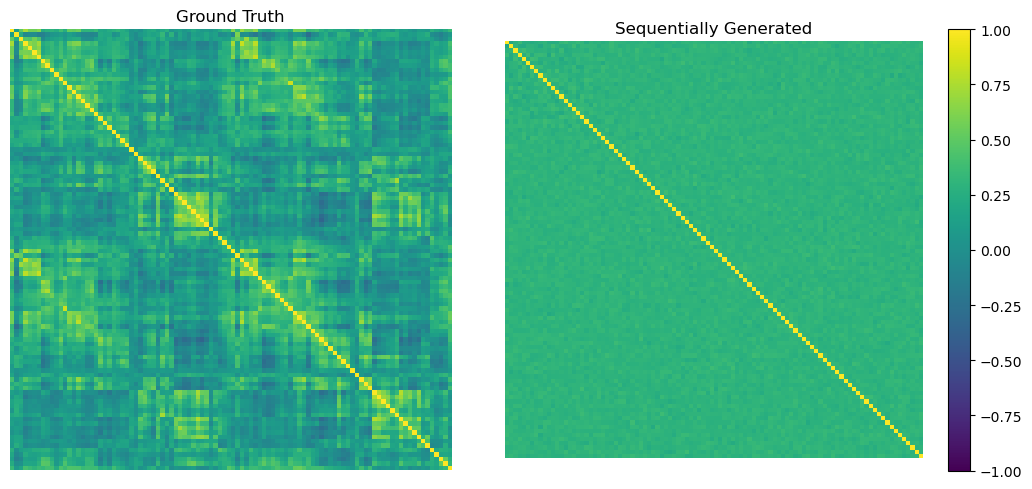

In [10]:
# TEST
show_subj_hemi(test_Target, test_pred, 0)

Correlation: 0.0859206300636099


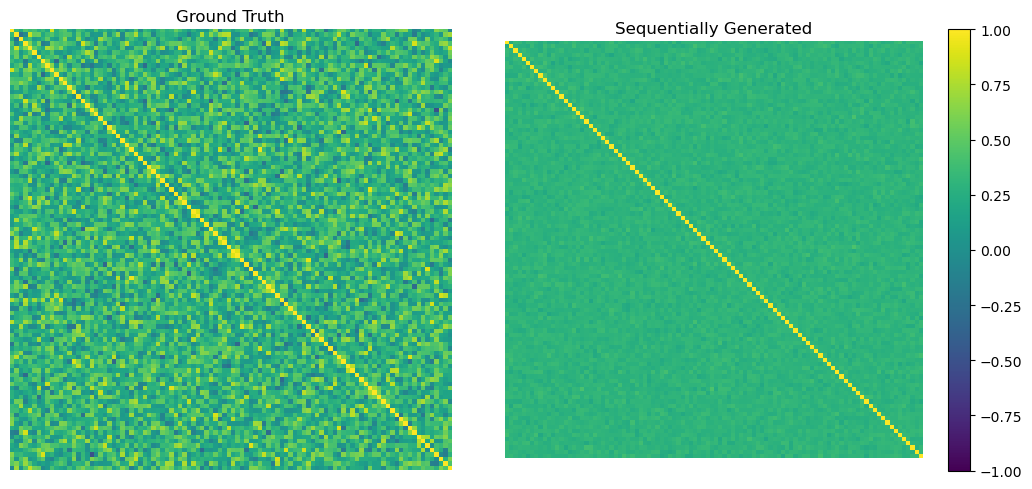

In [11]:
# TRAIN
show_subj_hemi(train_Target, train_pred, 0)

# TESTING SPARSE CONNECTION MASKING

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaskedLinear(nn.Linear):
    def __init__(self, *args, mask, **kwargs):
        super().__init__(*args, **kwargs)
        self.mask = mask

    def forward(self, input):
        return F.linear(input, self.weight*self.mask, self.bias)

In [19]:
mask = torch.zeros(4950, 10404)

i = 99
rowidx = 0
colidx = 102

while i >= 0:
    mask[rowidx:rowidx+i, colidx:colidx+102] = 1.0
    rowidx = rowidx+i
    colidx = colidx+102
    i -= 1

indices = torch.nonzero(mask == 1, as_tuple=False)


def create_mask(num_out_nodes, latent_length, num_extra_start_tokens):
    i = num_out_nodes-1
    rowidx = 0
    colidx = num_extra_start_tokens * latent_length

    len_out = (num_out_nodes * (num_out_nodes-1)) / 2
    len_in = latent_length*latent_length

    mask = torch.zeros(int(len_out), int(len_in))

    while i>=0:
        mask[rowidx:rowidx+i, colidx:colidx+latent_length] = 1.0
        rowidx = rowidx+i
        colidx = colidx+latent_length
        i -= 1

    return mask



tensor([[    0,   102],
        [    0,   103],
        [    0,   104],
        ...,
        [ 4949, 10197],
        [ 4949, 10198],
        [ 4949, 10199]])

In [7]:
tgt = torch.zeros(3, 102, 102)

for col in range(102):
    tgt[:, :, col] = col

tgt = tgt.transpose(1, 2).reshape(3, -1)


In [11]:
model = MaskedLinear(in_features = 10404, out_features=4950, mask=mask)

model(tgt).shape

torch.Size([3, 4950])

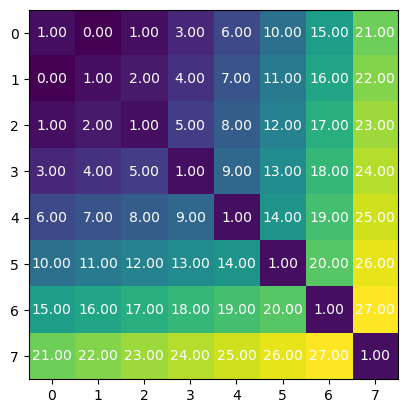

In [88]:
plt.imshow(make_netmat(np.arange(28), netmat_dim=8))

for i in range(make_netmat(np.arange(28), netmat_dim=8).shape[0]):
    for j in range(make_netmat(np.arange(28), netmat_dim=8).shape[1]):
        plt.text(j, i, f'{make_netmat(np.arange(28), netmat_dim=8)[i, j]:.2f}', ha='center', va='center', color='white')

In [191]:
def increasing_steps(start, step_sizes):
    current_value = start
    for step in step_sizes:
        yield current_value
        current_value += step

def create_mask(num_out_nodes, latent_length, num_extra_start_tokens):
    rowidx = 0
    colidx = num_extra_start_tokens * latent_length

    len_out = (num_out_nodes * (num_out_nodes-1)) / 2
    len_in = latent_length*latent_length

    mask = torch.zeros(int(len_out), int(len_in))

    counter = 1
    for i in increasing_steps(0, range(2, num_out_nodes+1)):
        
        for j in increasing_steps(i, range(counter, num_out_nodes)):
            mask[j, colidx:colidx+latent_length] = 1.0


        colidx = colidx+latent_length
        counter +=1
    
    return mask

   

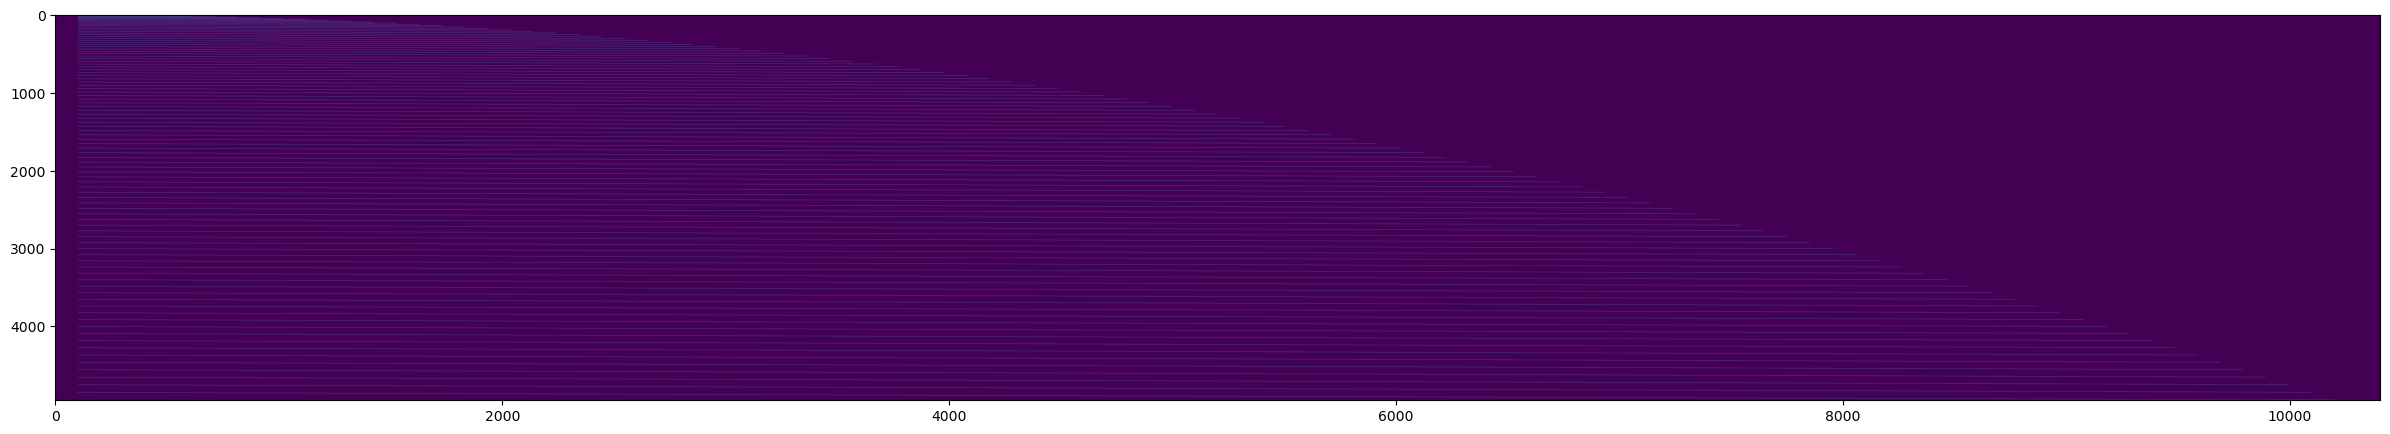

In [205]:
plt.figure(figsize=[30, 5])
plt.imshow(create_mask(100, 102, 1), aspect='auto')